# Table of contents

* [Import Required Packages](#section1)  
* [Read the Dataset](#section2)  
* [Data Preprocessing](#section3)  
  - [Analysis](#subsection3.1)    
* [Exploratory Data Analysis](#section4)  
  - [Analysis](#subsection4.1) 
* [Datasest Preparation for Multiple Algorithms](#section5)
* [Model Training using Multiple Algorithms](#section6)
  - [Linear Regression](#subsection6.1)
      + [Findings](#subsection6.1.1)
  - [Logistic Regression](#subsection6.2)
  - [XGBoost](#subsection6.3)
  - [SVM](#subsection6.4)
  - [Decision Tree Classifier](#subsection6.5)
  - [Naive Baise](#subsection6.6)
* [List of Calssifiers & Accuracy Comparison](#section7)
* [Algorithm Accuracy Comparison Analysis & Conclusion](#section8)

<a id="section1"></a>
## Import required package 
load the File 
read the dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, roc_curve, roc_auc_score
import xgboost as xgb
from scipy import stats
from sklearn.decomposition import PCA
import shap
from plotnine import ggplot, aes, geom_point, labs
from plotnine import ggplot, aes, geom_bar, coord_flip, labs
import altair as alt
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6
shap.initjs()
!pip install bokeh
!pip install altair
!pip install --upgrade bokeh
!pip install "vegafusion[embed]"
!pip install plotnine
!pip install xgboost
!pip install plotnine
!pip install -U scikit-learn
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from plotnine import ggplot, aes, geom_bar, ggtitle, xlab, ylab
from plotnine import ggplot, aes, geom_histogram, geom_density, facet_wrap, labs, theme
!pip install jupyter_contrib_nbextensions



<a id="section2"></a>
## Read the dataframe

In [2]:
db = pd.read_excel("C:\\Users\\habib\\OneDrive\\Documents\\Ashar Docs\\Data Sets\\CVD's Data REVISE2.xlsx")

In [3]:
db.head()

,patient_id,age,sex,education,marital_status,occupation,sbp_avg,dbp_avg,bg_mgdl,bmi,smoking,village,areas,cvdrisk,highrisk,bplt,lltt,aptt
0,7709001001,65,Female,primary,married,self-employed,140.5,78.5,156,18.90204,nonsmoker,jango,rural,0.10,No,No,No,No
1,7709001002,60,Male,primary,married,self-employed,156.0,108.5,113,25.47666,smoker,jango,rural,0.55,Yes,No,No,No
2,8005070201,87,Male,primary,married,not working,153.5,77.0,91,0.00000,smoker,tengaho,rural,0.30,Yes,No,No,No
3,8005070202,82,Female,primary,married,not working,152.0,76.0,114,23.89138,nonsmoker,tengaho,rural,0.30,Yes,No,No,No
4,8005070203,55,Female,primary,widowed,casual worker,179.0,94.0,130,29.48870,nonsmoker,tengaho,rural,0.55,Yes,No,No,No


<a id="section3"></a>
## Data Preprocessing:

In [4]:
db.shape

(22093, 18)

In [5]:
db.shape

(22093, 18)

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22093 entries, 0 to 22092
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      22093 non-null  int64  
 1   age             22093 non-null  int64  
 2   sex             22093 non-null  object 
 3   education       22080 non-null  object 
 4   marital_status  22030 non-null  object 
 5   occupation      22086 non-null  object 
 6   sbp_avg         22093 non-null  float64
 7   dbp_avg         22093 non-null  float64
 8   bg_mgdl         22093 non-null  int64  
 9   bmi             22093 non-null  float64
 10  smoking         22093 non-null  object 
 11  village         22093 non-null  object 
 12  areas           22093 non-null  object 
 13  cvdrisk         22093 non-null  float64
 14  highrisk        22093 non-null  object 
 15  bplt            22093 non-null  object 
 16  lltt            22093 non-null  object 
 17  aptt            22093 non-null 

In [7]:
db.describe()

,patient_id,age,sbp_avg,dbp_avg,bg_mgdl,bmi,cvdrisk
count,2.209300e+04,22093.000000,22093.000000,22093.000000,22093.000000,22093.000000,22093.000000
mean,5.993599e+11,54.916535,140.184212,88.258080,125.916082,24.815265,0.230743
std,1.758180e+12,10.787480,25.283275,14.194987,60.988611,5.316389,0.195495
min,7.709001e+09,40.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,1.020202e+11,46.000000,123.000000,79.500000,94.000000,21.641270,0.100000
50%,1.030302e+11,53.000000,136.500000,87.000000,110.000000,24.526820,0.100000
75%,1.040402e+11,61.000000,154.500000,95.500000,134.000000,27.700830,0.450000
max,9.711274e+12,116.000000,245.000000,190.000000,663.000000,53.624260,0.550000


In [8]:
db.isnull().sum()

patient_id         0
age                0
sex                0
education         13
marital_status    63
occupation         7
sbp_avg            0
dbp_avg            0
bg_mgdl            0
bmi                0
smoking            0
village            0
areas              0
cvdrisk            0
highrisk           0
bplt               0
lltt               0
aptt               0
dtype: int64

In [9]:
db1 = db.copy()

In [10]:
db1.dropna(inplace=True)

In [11]:
db1.isna().sum()

patient_id        0
age               0
sex               0
education         0
marital_status    0
occupation        0
sbp_avg           0
dbp_avg           0
bg_mgdl           0
bmi               0
smoking           0
village           0
areas             0
cvdrisk           0
highrisk          0
bplt              0
lltt              0
aptt              0
dtype: int64

In [12]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22011 entries, 0 to 22092
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      22011 non-null  int64  
 1   age             22011 non-null  int64  
 2   sex             22011 non-null  object 
 3   education       22011 non-null  object 
 4   marital_status  22011 non-null  object 
 5   occupation      22011 non-null  object 
 6   sbp_avg         22011 non-null  float64
 7   dbp_avg         22011 non-null  float64
 8   bg_mgdl         22011 non-null  int64  
 9   bmi             22011 non-null  float64
 10  smoking         22011 non-null  object 
 11  village         22011 non-null  object 
 12  areas           22011 non-null  object 
 13  cvdrisk         22011 non-null  float64
 14  highrisk        22011 non-null  object 
 15  bplt            22011 non-null  object 
 16  lltt            22011 non-null  object 
 17  aptt            22011 non-null 

In [13]:
db1['sex'] = db1['sex'].astype('category');
db1['highrisk'] = db1['highrisk'].astype('category');
db1['bplt'] = db1['bplt'].astype('category');
db1['lltt'] = db1['lltt'].astype('category');
db1['aptt'] = db1['aptt'].astype('category');

In [14]:
categorical_Data = db1['sex'].cat.codes
categorical_Data = db1['highrisk'].cat.codes
categorical_Data = db1['bplt'].cat.codes
categorical_Data = db1['lltt'].cat.codes
categorical_Data = db1['aptt'].cat.codes

In [15]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22011 entries, 0 to 22092
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   patient_id      22011 non-null  int64   
 1   age             22011 non-null  int64   
 2   sex             22011 non-null  category
 3   education       22011 non-null  object  
 4   marital_status  22011 non-null  object  
 5   occupation      22011 non-null  object  
 6   sbp_avg         22011 non-null  float64 
 7   dbp_avg         22011 non-null  float64 
 8   bg_mgdl         22011 non-null  int64   
 9   bmi             22011 non-null  float64 
 10  smoking         22011 non-null  object  
 11  village         22011 non-null  object  
 12  areas           22011 non-null  object  
 13  cvdrisk         22011 non-null  float64 
 14  highrisk        22011 non-null  category
 15  bplt            22011 non-null  category
 16  lltt            22011 non-null  category
 17  aptt        

In [16]:
print(db1['sex'].unique())
print(db1['highrisk'].unique())
print(db1['bplt'].unique())
print(db1['lltt'].unique())
print(db1['aptt'].unique())


['Female', 'Male']
Categories (2, object): ['Female', 'Male']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']


<a id="subsection3.1"></a>

### Analysis :

 

Data Completeness:

All categorical variables are non-null, meaning there are no missing values for these variables in the dataset. This is a positive aspect as it means each record is complete with respect to these variables.

Memory Usage:

Categorical data types are useful for saving memory when a column has only a small number of distinct categories. From the info provided, these categorical variables contribute to efficient memory usage.

Variable Encoding:

For machine learning models, we might need to encode these categorical variables into numerical form. Encoding methods like one-hot encoding or label encoding can be used depending on the nature of the variable (nominal or ordinal).

Exploratory Data Analysis (EDA):

It would be beneficial to explore the unique categories within each of these variables and their distribution. This can provide insights into the diversity and balance of categories in the dataset.

Feature Engineering:

Depending on the analysis or model building, these categorical variables might require feature engineering to extract more meaningful information or to transform them into a format suitable for modeling.

In [17]:
db1.describe()

,patient_id,age,sbp_avg,dbp_avg,bg_mgdl,bmi,cvdrisk
count,2.201100e+04,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000
mean,6.004555e+11,54.912907,140.178197,88.258905,125.919586,24.813046,0.230760
std,1.760389e+12,10.786693,25.296091,14.199137,60.984590,5.318361,0.195516
min,7.709001e+09,40.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,1.020202e+11,46.000000,123.000000,79.500000,94.000000,21.641270,0.100000
50%,1.030302e+11,53.000000,136.500000,87.000000,110.000000,24.526820,0.100000
75%,1.040402e+11,61.000000,154.500000,95.500000,134.000000,27.700830,0.450000
max,9.711274e+12,116.000000,245.000000,190.000000,663.000000,53.624260,0.550000


In [18]:
db1.corr()

,patient_id,age,sbp_avg,dbp_avg,bg_mgdl,bmi,cvdrisk
patient_id,1.000000,0.001687,0.007296,0.008360,-0.001498,0.006066,0.006920
age,0.001687,1.000000,0.263526,-0.039284,0.058495,-0.258770,0.241036
sbp_avg,0.007296,0.263526,1.000000,0.792850,0.104097,0.113916,0.733698
dbp_avg,0.008360,-0.039284,0.792850,1.000000,0.055725,0.236623,0.624909
bg_mgdl,-0.001498,0.058495,0.104097,0.055725,1.000000,0.096113,0.108665
bmi,0.006066,-0.258770,0.113916,0.236623,0.096113,1.000000,0.102833
cvdrisk,0.006920,0.241036,0.733698,0.624909,0.108665,0.102833,1.000000


#### Analysis :

here we can see that cvdrisk columns shows the relationship between the sbp_avg and dbp_avg high coorelation followed by bg_mgdl, and bmi.

In [19]:
# Analysing the Target variable:

In [20]:
inspection_cvdrisk = db1['cvdrisk'].value_counts().sort_values(ascending=False)
inspection_cvdrisk

0.10    14447
0.55     5442
0.20     1126
0.45      765
0.30      211
0.40       13
0.50        7
Name: cvdrisk, dtype: int64

In [21]:
# !pip install --upgrade bokeh

data = {'cvdrisk': [0.10, 0.55, 0.20, 0.45, 0.30, 0.40, 0.50],
        'count': [14447, 5442, 1126, 765, 211, 13, 7]}
df = pd.DataFrame(data)

# Function to categorize cvdrisk
def categorize_cvdrisk(value):
    if 0.10 <= value < 0.20:
        return 'mild'
    elif 0.20 <= value < 0.35:
        return 'medium'
    elif 0.35 <= value < 0.55:
        return 'high'
    else:
        return 'very high'

# Apply the function to the cvdrisk column
df['category'] = df['cvdrisk'].apply(categorize_cvdrisk)

# Get the total count for each category
category_counts = df.groupby('category')['count'].sum().sort_values(ascending=False)

# Create a new DataFrame for category counts
category_counts_df = pd.DataFrame(category_counts).reset_index()
category_counts_df.columns = ['Category', 'Count']
category_counts_df


,Category,Count
0,mild,14447
1,very high,5442
2,medium,1337
3,high,785


<a id="section4"></a>

### Exploratory Data Analysis :

In [22]:
# Configure Bokeh to display plots inline in the Jupyter notebook
output_notebook()

# Sample data
data = {'cvdrisk': [0.10, 0.55, 0.20, 0.45, 0.30, 0.40, 0.50],
        'count': [14447, 5442, 1126, 765, 211, 13, 7]}
df = pd.DataFrame(data)

# Function to categorize cvdrisk
def categorize_cvdrisk(value):
    if 0.10 <= value < 0.20:
        return 'mild'
    elif 0.20 <= value < 0.35:
        return 'medium'
    elif 0.35 <= value < 0.55:
        return 'high'
    else:
        return 'very high'

# Apply the function to the cvdrisk column
df['category'] = df['cvdrisk'].apply(categorize_cvdrisk)

# Get the total count for each category
category_counts = df.groupby('category')['count'].sum().sort_values(ascending=False)

# Create a ColumnDataSource
source = ColumnDataSource(data=dict(categories=list(category_counts.index), counts=list(category_counts.values)))

# Create a figure
p = figure(x_range=list(category_counts.index), height=350, title="Category Counts",
           toolbar_location=None, tools="")

# Create a vertical bar plot
p.vbar(x='categories', top='counts', width=0.9, source=source, legend_field="categories",
       line_color='white', fill_color=factor_cmap('categories', palette=Spectral6, factors=list(category_counts.index)))

# Customize the plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = max(category_counts.values) + 1000
p.legend.orientation = "horizontal"
p.legend.location = "top_right"

# Show the plot
show(p)


Loading BokehJS ...

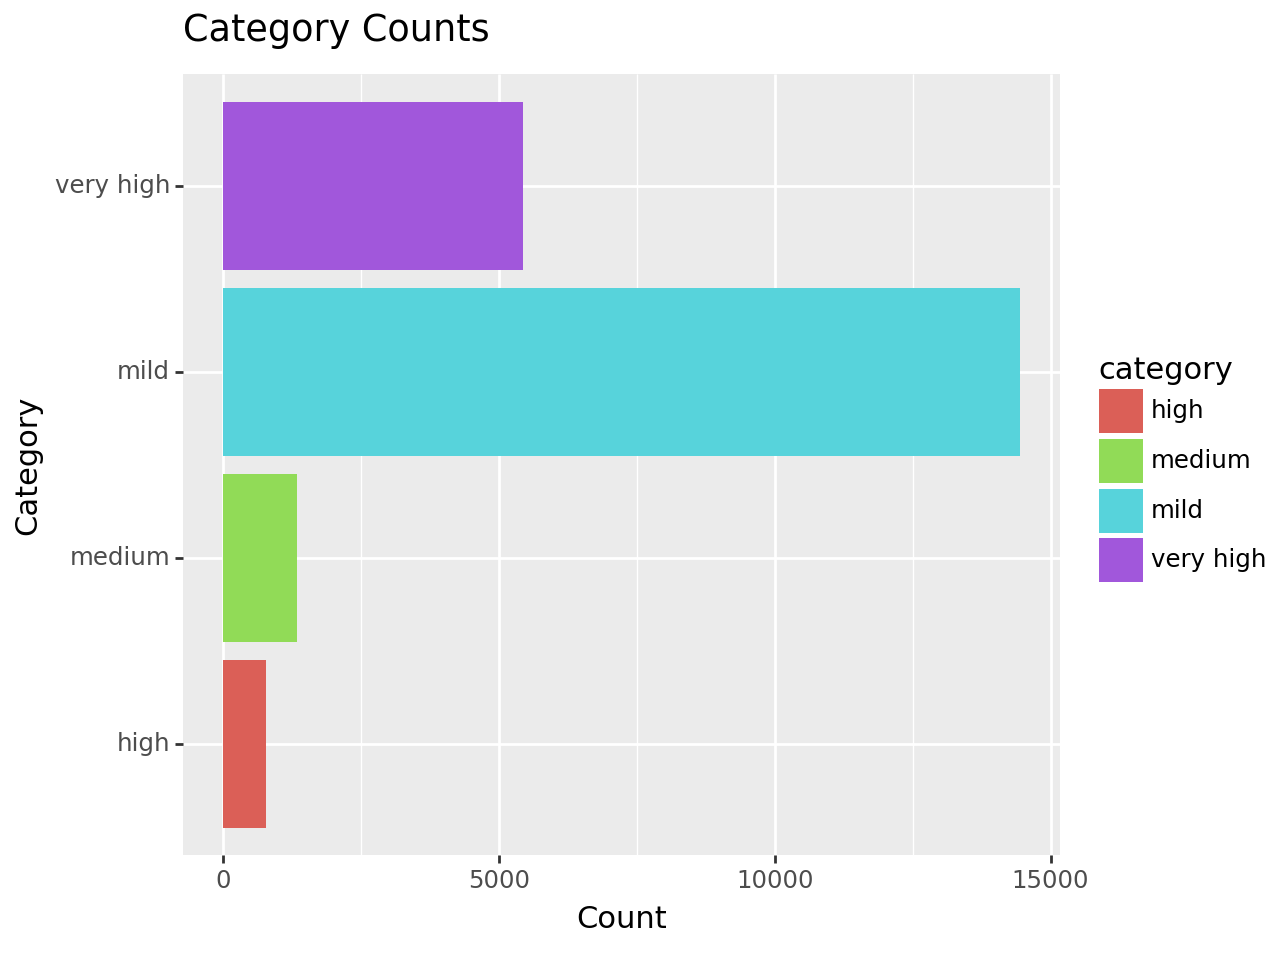

In [23]:
# inspection_cvdrisk
data = {'cvdrisk': [0.10, 0.55, 0.20, 0.45, 0.30, 0.40, 0.50],
        'count': [14447, 5442, 1126, 765, 211, 13, 7]}
df = pd.DataFrame(data)

# Function to categorize cvdrisk
def categorize_cvdrisk(value):
    if 0.10 <= value < 0.20:
        return 'mild'
    elif 0.20 <= value < 0.35:
        return 'medium'
    elif 0.35 <= value < 0.55:
        return 'high'
    else:
        return 'very high'

# Apply the function to the cvdrisk column
df['category'] = df['cvdrisk'].apply(categorize_cvdrisk)

# Get the total count for each category
category_counts = df.groupby('category')['count'].sum().reset_index()

# Create a ggplot-style plot
plot = (ggplot(category_counts, aes(x='category', y='count', fill='category'))
        + geom_bar(stat='identity')
        + coord_flip()
        + labs(title="Category Counts", x="Category", y="Count"))

# Show the plot
print(plot)


In [24]:
inspection_sbp = db1[['sbp_avg','cvdrisk']]
inspection_sbp


,sbp_avg,cvdrisk
0,140.5,0.10
1,156.0,0.55
2,153.5,0.30
3,152.0,0.30
4,179.0,0.55
...,...,...
22088,117.5,0.10
22089,141.0,0.10
22090,123.5,0.10
22091,124.5,0.10


In [25]:
# Enable the vegafusion data transformer
alt.data_transformers.enable('vegafusion')

# Assuming inspection_sbp is a DataFrame with two columns
data = pd.DataFrame({
    'x_variable': inspection_sbp.iloc[:, 0],  # Adjust with your actual column
    'y_variable': inspection_sbp.iloc[:, 1]   # Adjust with your actual column
})

# Create an Altair scatter plot
scatter_plot = alt.Chart(data).mark_circle(size=60).encode(
    x=alt.X('x_variable:Q', title='sbp_avg'),  # Adjust 'X Axis Label' accordingly
    y=alt.Y('y_variable:Q', title='cvdrisk'),  # Adjust 'Y Axis Label' accordingly
    tooltip=['x_variable', 'y_variable']           # Optional: displays values on hover
).properties(
    width=800,
    height=600,
    title='cvdrisk v/s sbp_avg'                 # Adjust with your desired title
)

scatter_plot


alt.Chart(...)

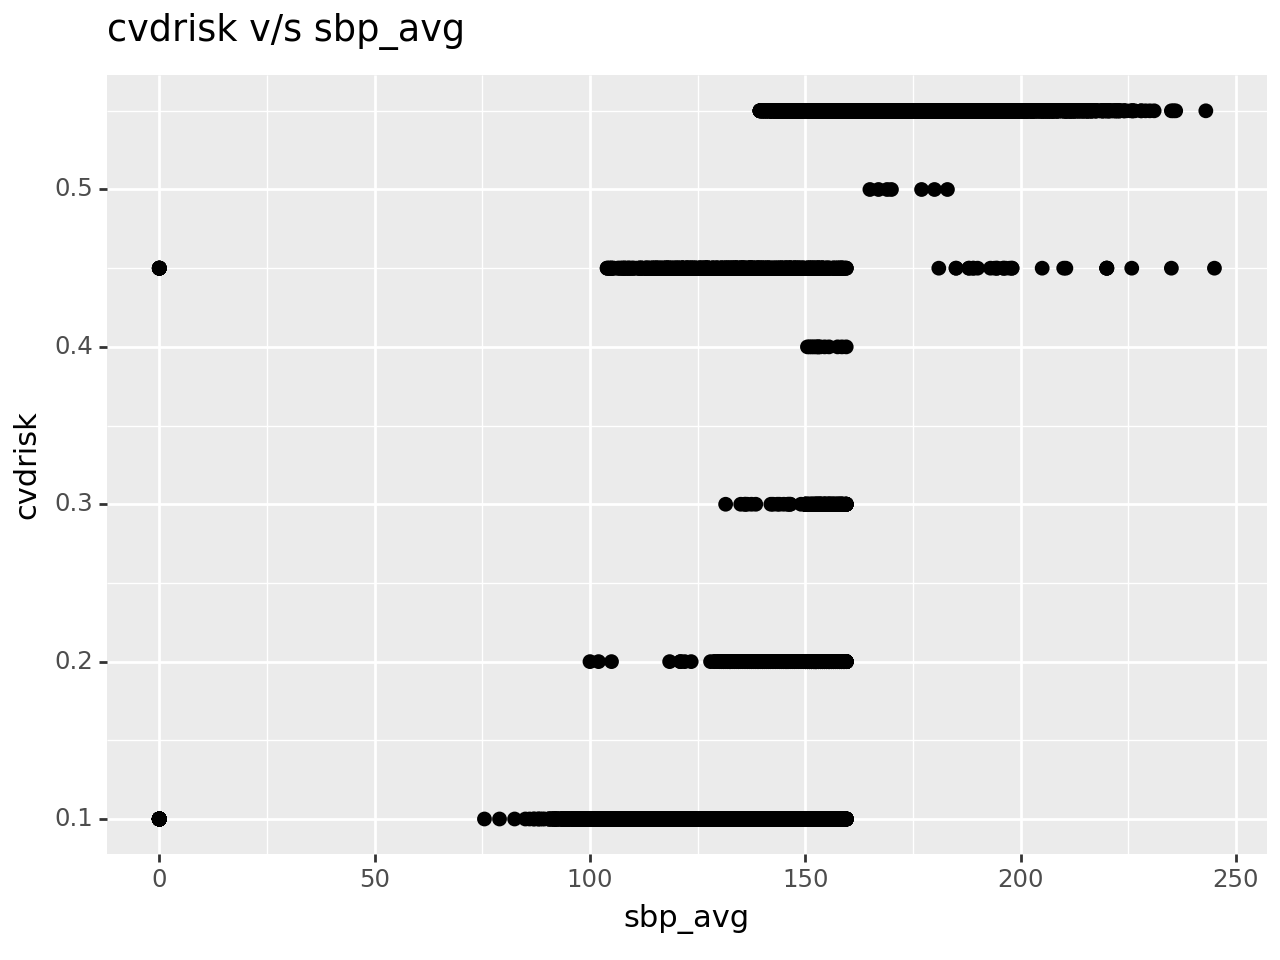

In [26]:
data = pd.DataFrame({
    'x_variable': inspection_sbp.iloc[:, 0],  
    'y_variable': inspection_sbp.iloc[:, 1]   
})

# Create a ggplot scatter plot
scatter_plot = (
    ggplot(data, aes(x='x_variable', y='y_variable')) +
    geom_point(size=2, color='black') +
    labs(
        title='cvdrisk v/s sbp_avg',  # Adjust with your desired title
        x='sbp_avg',                # Adjust 'X Axis Label' accordingly
        y='cvdrisk'                 # Adjust 'Y Axis Label' accordingly
    )
)

print(scatter_plot)


In [27]:
inspection_dbp = db1[['dbp_avg','cvdrisk']]
inspection_dbp


,dbp_avg,cvdrisk
0,78.5,0.10
1,108.5,0.55
2,77.0,0.30
3,76.0,0.30
4,94.0,0.55
...,...,...
22088,80.0,0.10
22089,97.0,0.10
22090,81.0,0.10
22091,95.5,0.10


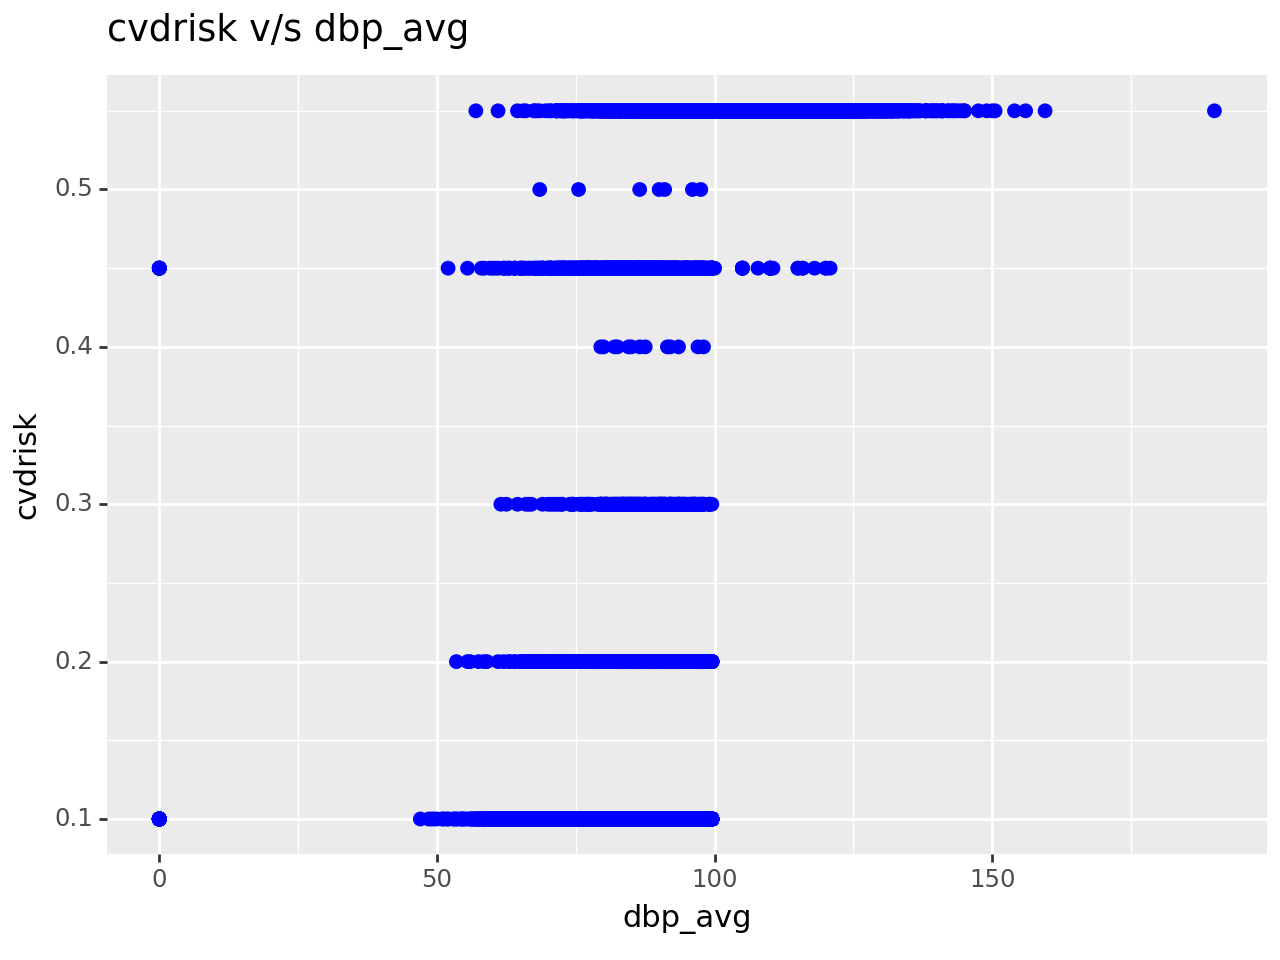

In [28]:
# Assuming inspection_sbp is a DataFrame with two columns
data = pd.DataFrame({
    'x_variable': inspection_dbp.iloc[:, 0],  
    'y_variable': inspection_dbp.iloc[:, 1]   
})

# Create a ggplot scatter plot
scatter_plot = (
    ggplot(data, aes(x='x_variable', y='y_variable')) +
    geom_point(size=2, color='blue') +
    labs(
        title='cvdrisk v/s dbp_avg',  # Adjust with your desired title
        x='dbp_avg',                # Adjust 'X Axis Label' accordingly
        y='cvdrisk'                 # Adjust 'Y Axis Label' accordingly
    )
)

print(scatter_plot)


In [29]:
inspection_bg_mgdl = db1[['bg_mgdl','cvdrisk']]
inspection_bg_mgdl


,bg_mgdl,cvdrisk
0,156,0.10
1,113,0.55
2,91,0.30
3,114,0.30
4,130,0.55
...,...,...
22088,322,0.10
22089,111,0.10
22090,87,0.10
22091,86,0.10


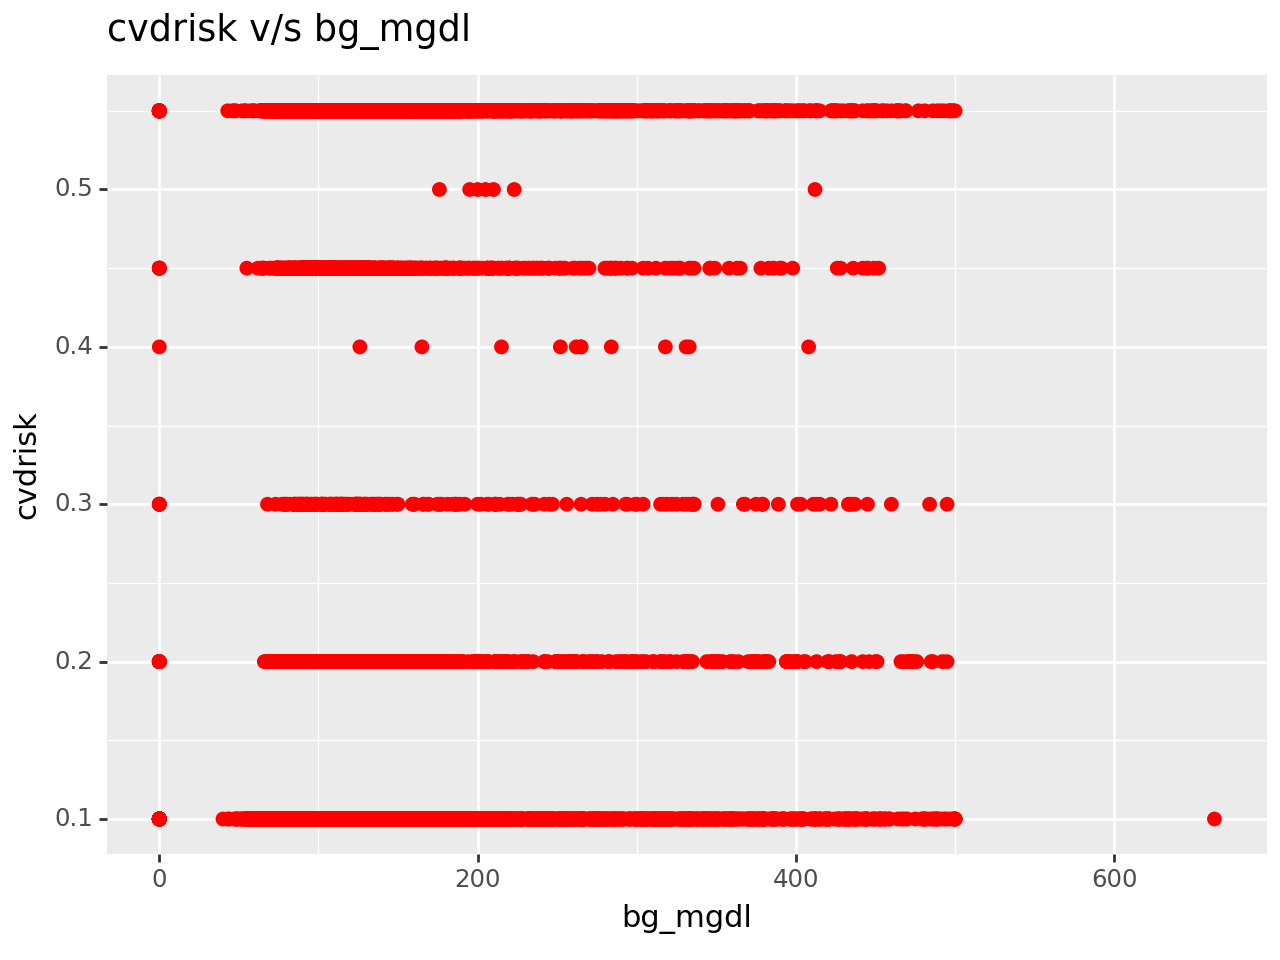

In [30]:
# Assuming inspection_sbp is a DataFrame with two columns
data = pd.DataFrame({
    'x_variable': inspection_bg_mgdl.iloc[:, 0],  
    'y_variable': inspection_bg_mgdl.iloc[:, 1]   
})

# Create a ggplot scatter plot
scatter_plot = (
    ggplot(data, aes(x='x_variable', y='y_variable')) +
    geom_point(size=2, color='red') +
    labs(
        title='cvdrisk v/s bg_mgdl',  # Adjust with your desired title
        x='bg_mgdl',                # Adjust 'X Axis Label' accordingly
        y='cvdrisk'                 # Adjust 'Y Axis Label' accordingly
    )
)

print(scatter_plot)


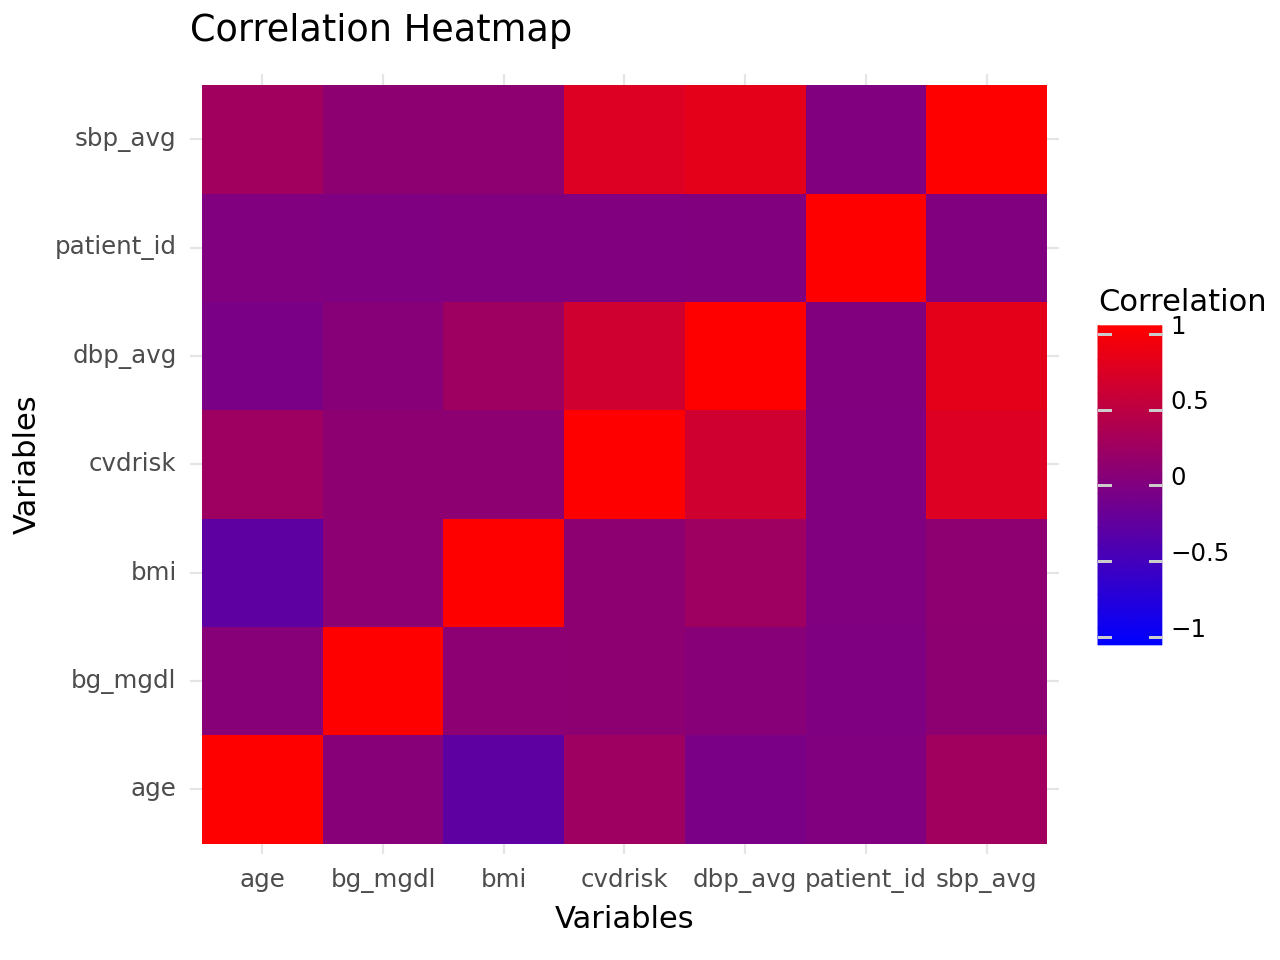

In [31]:
from plotnine import ggplot, aes, geom_tile, scale_fill_gradient, theme_minimal, labs


# Assuming db1 is a DataFrame
correlation_matrix = db1.corr()

# Convert the correlation matrix to a long format
melted_corr = correlation_matrix.reset_index().melt(id_vars='index')

# Create a ggplot heatmap
heatmap = (
    ggplot(melted_corr, aes(x='index', y='variable', fill='value')) +
    geom_tile() +
    scale_fill_gradient(low="blue", high="red", name="Correlation", limits=(-1, 1)) +
    theme_minimal() +
    labs(
        title='Correlation Heatmap',
        x='Variables',
        y='Variables',
        fill='Correlation'
    )
)

print(heatmap)


<a id="subsection4.1"></a>
### Analysis:



1. Patient ID:
Correlation with Other Variables: Patient ID does not show any significant correlation with any of the health metrics, which is expected as it's just an identifier.

2. Age:
Correlation with _SBP Average_ (0.26): There is a moderate positive correlation, indicating that as age increases, systolic blood pressure tends to increase as well. This is a common trend as older individuals are often at a higher risk of hypertension.

Correlation with _BMI_ (-0.26): There is a moderate negative correlation with BMI, suggesting that as age increases, BMI tends to decrease. This could be due to various factors including metabolism, physical activity, etc.

Correlation with _CVD Risk_ (0.24): A moderate positive correlation indicates that as age increases, the risk of cardiovascular diseases tends to increase. This is a well-established trend in health studies.

3. SBP (Systolic Blood Pressure) Average:

Correlation with _DBP Average_ (0.79): A strong positive correlation indicating that individuals with higher systolic blood pressure often have higher diastolic blood pressure. This is a typical physiological relationship.

Correlation with _CVD Risk_ (0.73): Another strong positive correlation, indicating that higher systolic blood pressure is associated with an increased risk of cardiovascular diseases.

4. DBP (Diastolic Blood Pressure) Average:
Correlation with _CVD Risk_ (0.62): There is a strong positive correlation, indicating that individuals with higher diastolic blood pressure are at an increased risk of cardiovascular diseases.

5. BG (Blood Glucose) mg/dL:
Correlation with Other Variables: The correlations are relatively low, indicating that blood glucose levels are not strongly linearly associated with the other variables in this dataset. However, there is still a positive correlation with _CVD risk_ (0.11), indicating that higher blood glucose levels can be associated with an increased risk of cardiovascular diseases.

6. BMI (Body Mass Index):
Correlation with _DBP Average_ (0.24): A moderate positive correlation indicates that higher BMI is associated with higher diastolic blood pressure. This can be due to the increased pressure and workload on the heart in individuals with higher BMI.

7. CVD Risk:
Correlation with _SBP and DBP_ Average: As noted earlier, there is a strong positive correlation with both systolic and diastolic blood pressure, indicating that blood pressure is a significant predictor of cardiovascular disease risk.

**Key Insights:**

_Blood Pressure and CVD Risk:_ Both systolic and diastolic blood pressures are strongly correlated with the risk of cardiovascular diseases. Monitoring and managing blood pressure is crucial for reducing CVD risk.

_Age Factor:_ Age is positively correlated with SBP and CVD risk, indicating the need for targeted interventions and preventive measures for older adults.

_BMI Concerns:_ The positive correlation between BMI and DBP average underscores the importance of weight management in controlling blood pressure and reducing CVD risk.

**Recommendations:**

1. Targeted Health Programs: Implement health programs focusing on blood pressure management, especially for older adults.

2. Lifestyle Interventions: Encourage lifestyle changes, including a balanced diet and regular physical activity, to manage BMI and blood pressure.

3. Regular Monitoring: Regular monitoring of blood pressure and blood glucose levels to identify and manage potential health risks early.

In [32]:
num_features = [['age', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]


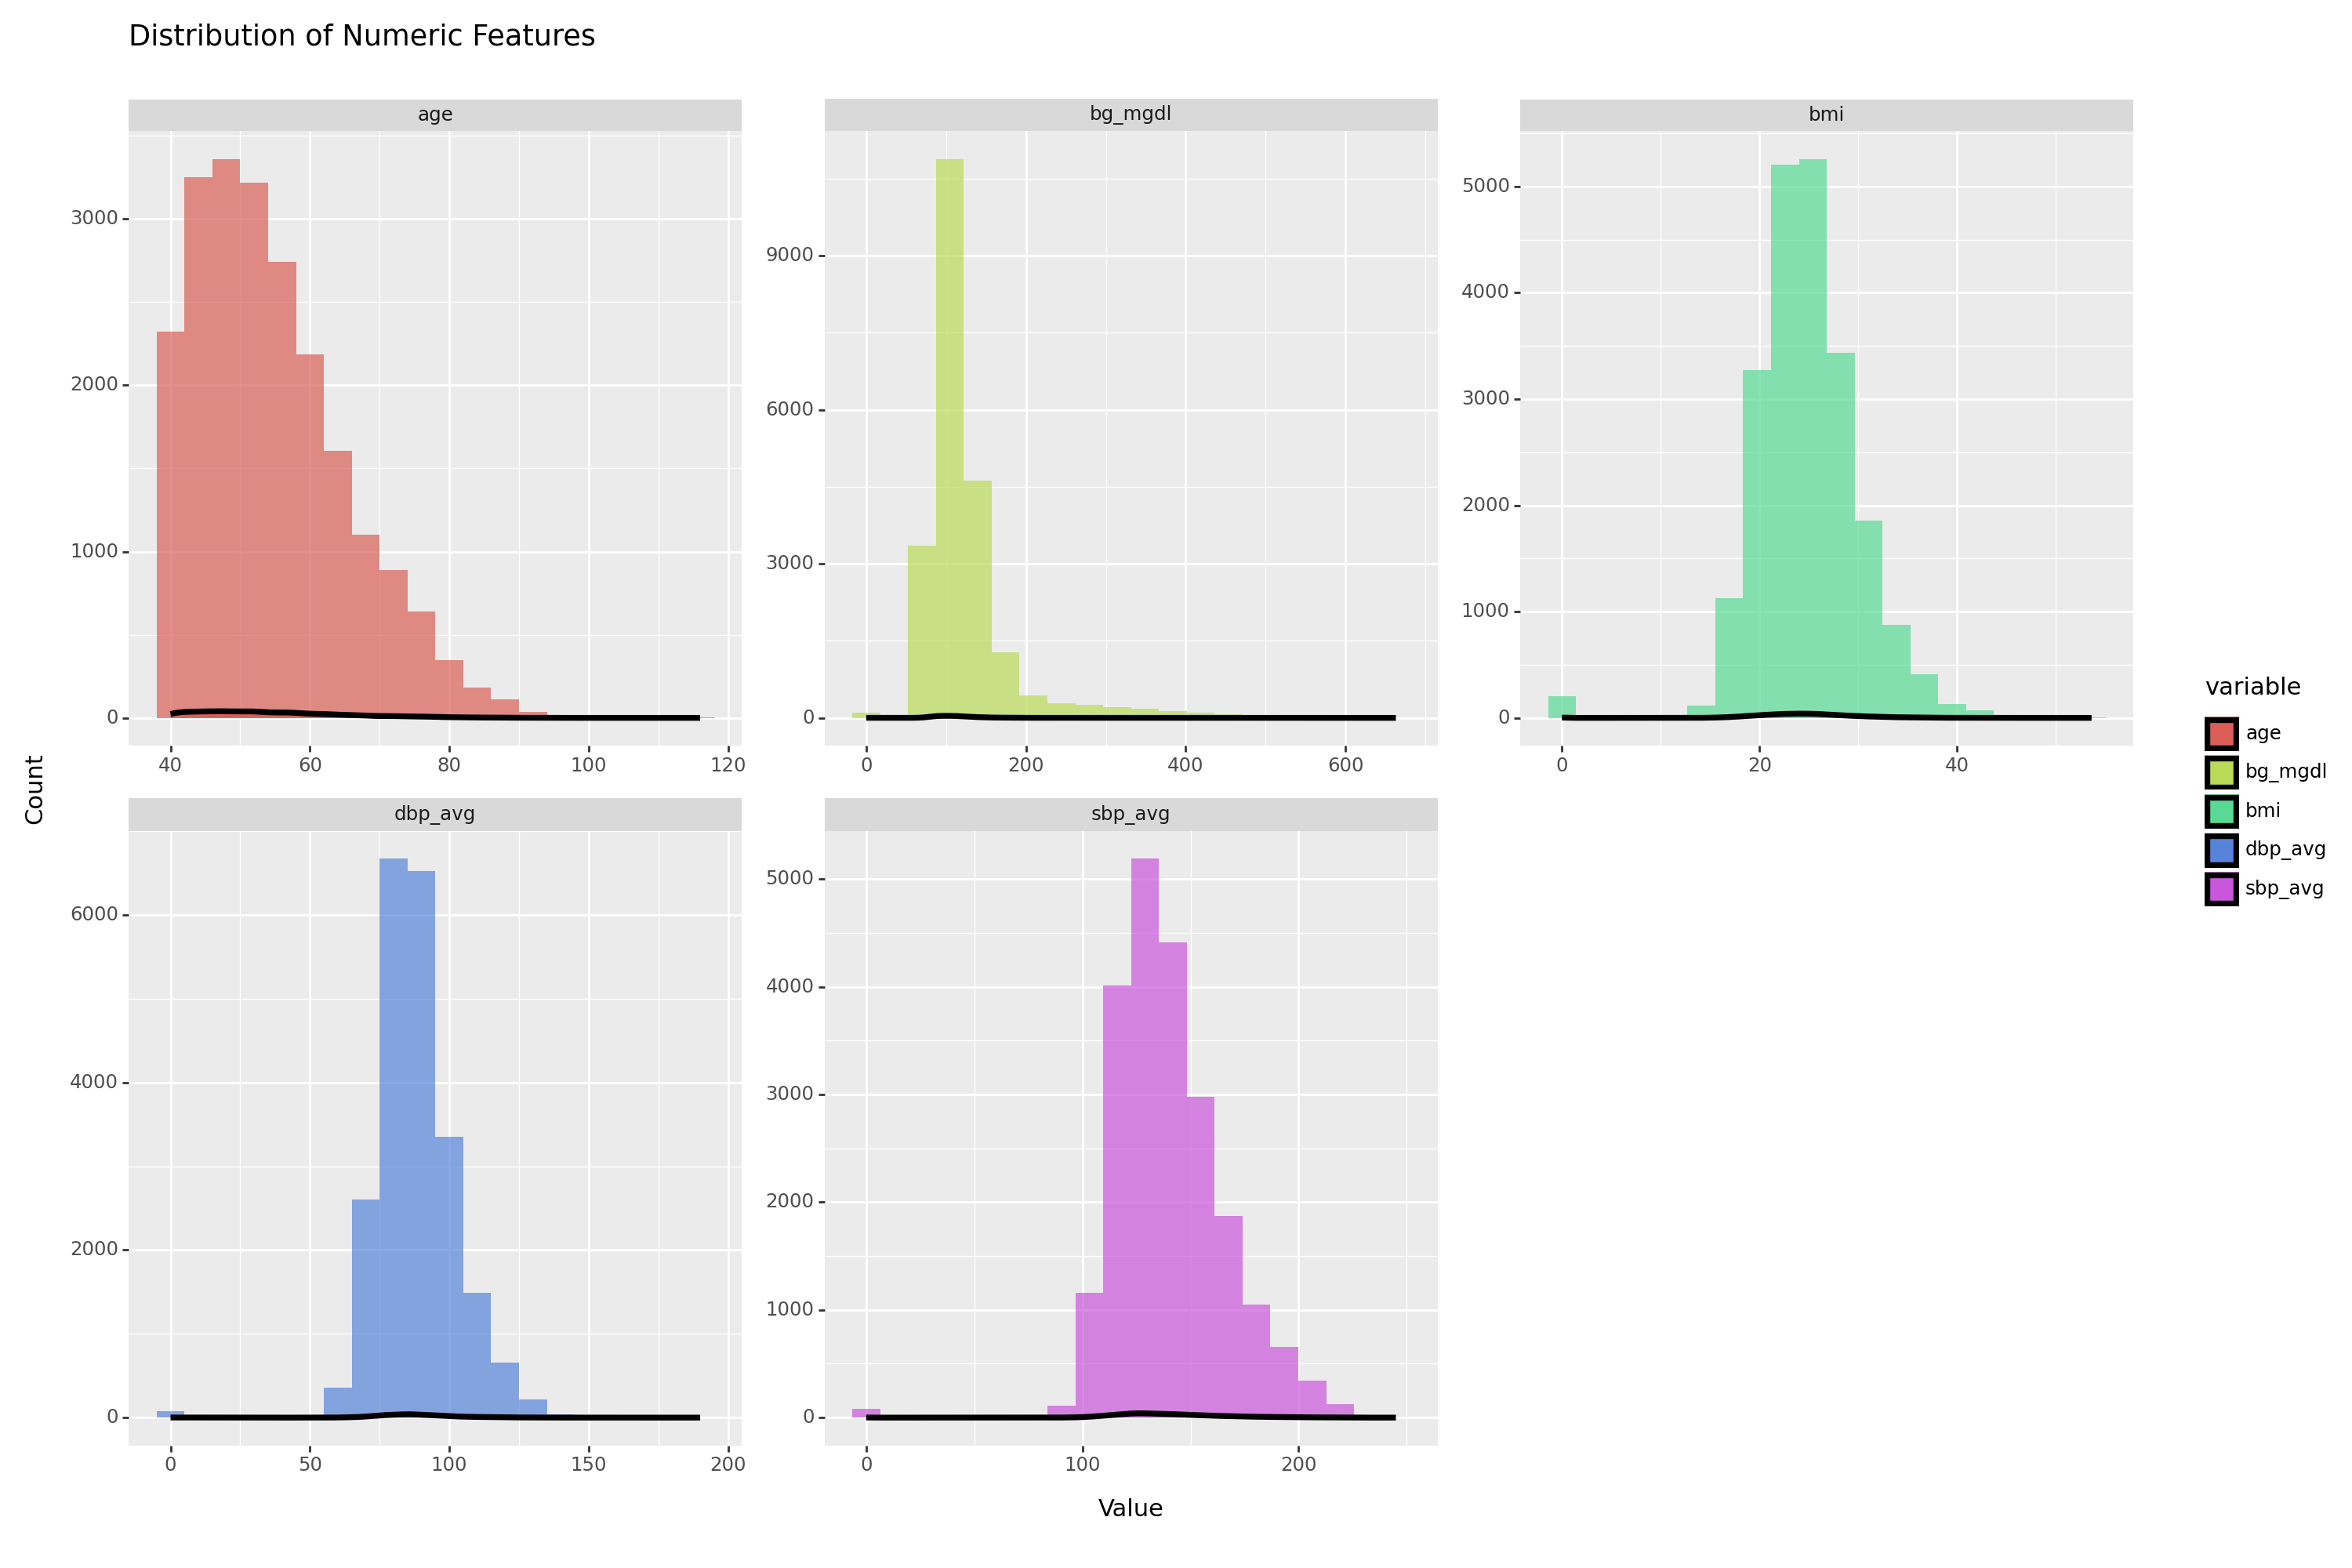

In [33]:
# db1 is our DataFrame and num_features is a list of column names
numeric_features = ['age', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']  # Example column names, replace with your actual column names

data = db1[numeric_features]  # This will select the columns from the DataFrame

# Convert the DataFrame to long format for easier plotting with ggplot
data_long = pd.melt(data, value_vars=numeric_features)

# Create a ggplot histogram with density plot
plot = (
    ggplot(data_long, aes(x='value', fill='variable')) +
    geom_histogram(bins=20, alpha=0.7, position="identity") +
    geom_density(aes(y='..scaled..*40'), size=1.5) +
    facet_wrap('~ variable', scales='free') +
    labs(x='Value', y='Count', title='Distribution of Numeric Features') +
    theme(figure_size=(15, 10))
)

# Show the plot
print(plot)


#### Analysis:

1. Age:

Distribution: Look at the shape of the histogram. If it's normally distributed, most individuals are middle-aged. If it's right-skewed, there are more young people, and if left-skewed, there are more older adults.

Insights: The above age distribution highlight the age group that is most at risk or prevalent in the dataset from age 40 to 60.

2. SBP Average:

Distribution: Analyze if there are any patterns or anomalies. A higher SBP can indicate hypertension or other health issues.

Insights: Correlate with age to see if increased age results in higher SBP. It can be used to identify individuals or age groups at risk of hypertension.

3. DBP Average:

Distribution: Similar to SBP, look for patterns or anomalies. Higher DBP can also indicate potential health issues.

Insights: Correlate with other health indicators to identify potential health risks or conditions.

4. BG mg/dL:

Distribution: Look for the range and distribution. Higher levels can indicate diabetes or prediabetes.

Insights: This can be crucial for identifying individuals at risk of diabetes. Correlate with age to see if diabetes is more common in certain age groups.

5. BMI:

Distribution: Analyze the spread. Higher BMI can indicate obesity, while lower can indicate underweight.

Insights: Correlate with other health metrics to see the impact of BMI on overall health. Identify if certain age groups have higher BMI and the potential health risks associated.

__Key Points to Consider:__

1. Correlations: Look for correlations between the features. For example, is higher BMI associated with higher blood pressure or blood glucose levels?

2. Health Risks: Identify patterns that could indicate health risks, such as higher BMI and blood pressure levels correlating with older age.

3. Preventive Measures: The data can be used to identify at-risk groups and implement preventive health measures.

__Recommendations:__

1. Health Interventions: Targeted health interventions can be designed for specific age groups or individuals with certain health metrics.

2. Further Analysis: Consider more detailed analysis, including other health and lifestyle factors to get a comprehensive view of the health status of the population in the dataset.

3. Policy Making: The insights derived can be instrumental in health policy making and designing public health campaigns.

<a id="section5"></a>
### Dataset Preparation for Multiple Algorithms:

In [34]:
# Select only numeric columns for z-score calculation
numeric_columns = db1.select_dtypes(include=[np.number])

# Calculate z-scores for numeric columns
z_scores = np.abs(stats.zscore(numeric_columns))

# Set a threshold for z-scores above which values are considered outliers
threshold = 3

# Create a boolean mask for identifying outliers in any column
outlier_mask = (z_scores > threshold).any(axis=1)

# Create a new DataFrame without outliers
df_no_outliers = db1[~outlier_mask]

# Display the top 5 rows of the DataFrame without outliers
df_no_outliers.describe()


,patient_id,age,sbp_avg,dbp_avg,bg_mgdl,bmi,cvdrisk
count,2.000500e+04,20005.000000,20005.000000,20005.000000,20005.000000,20005.000000,20005.000000
mean,3.187875e+11,54.600350,139.792552,88.169927,117.407848,24.889036,0.225444
std,8.500745e+11,10.460096,23.075979,12.702048,38.918047,4.518979,0.193450
min,7.709001e+09,40.000000,79.000000,47.000000,0.000000,14.073940,0.100000
25%,1.020202e+11,46.000000,123.000000,79.500000,93.000000,21.671260,0.100000
50%,1.030301e+11,53.000000,136.000000,86.500000,109.000000,24.508950,0.100000
75%,1.040401e+11,61.000000,153.500000,95.500000,130.000000,27.630370,0.450000
max,5.691157e+12,87.000000,216.000000,130.500000,308.000000,40.723770,0.550000


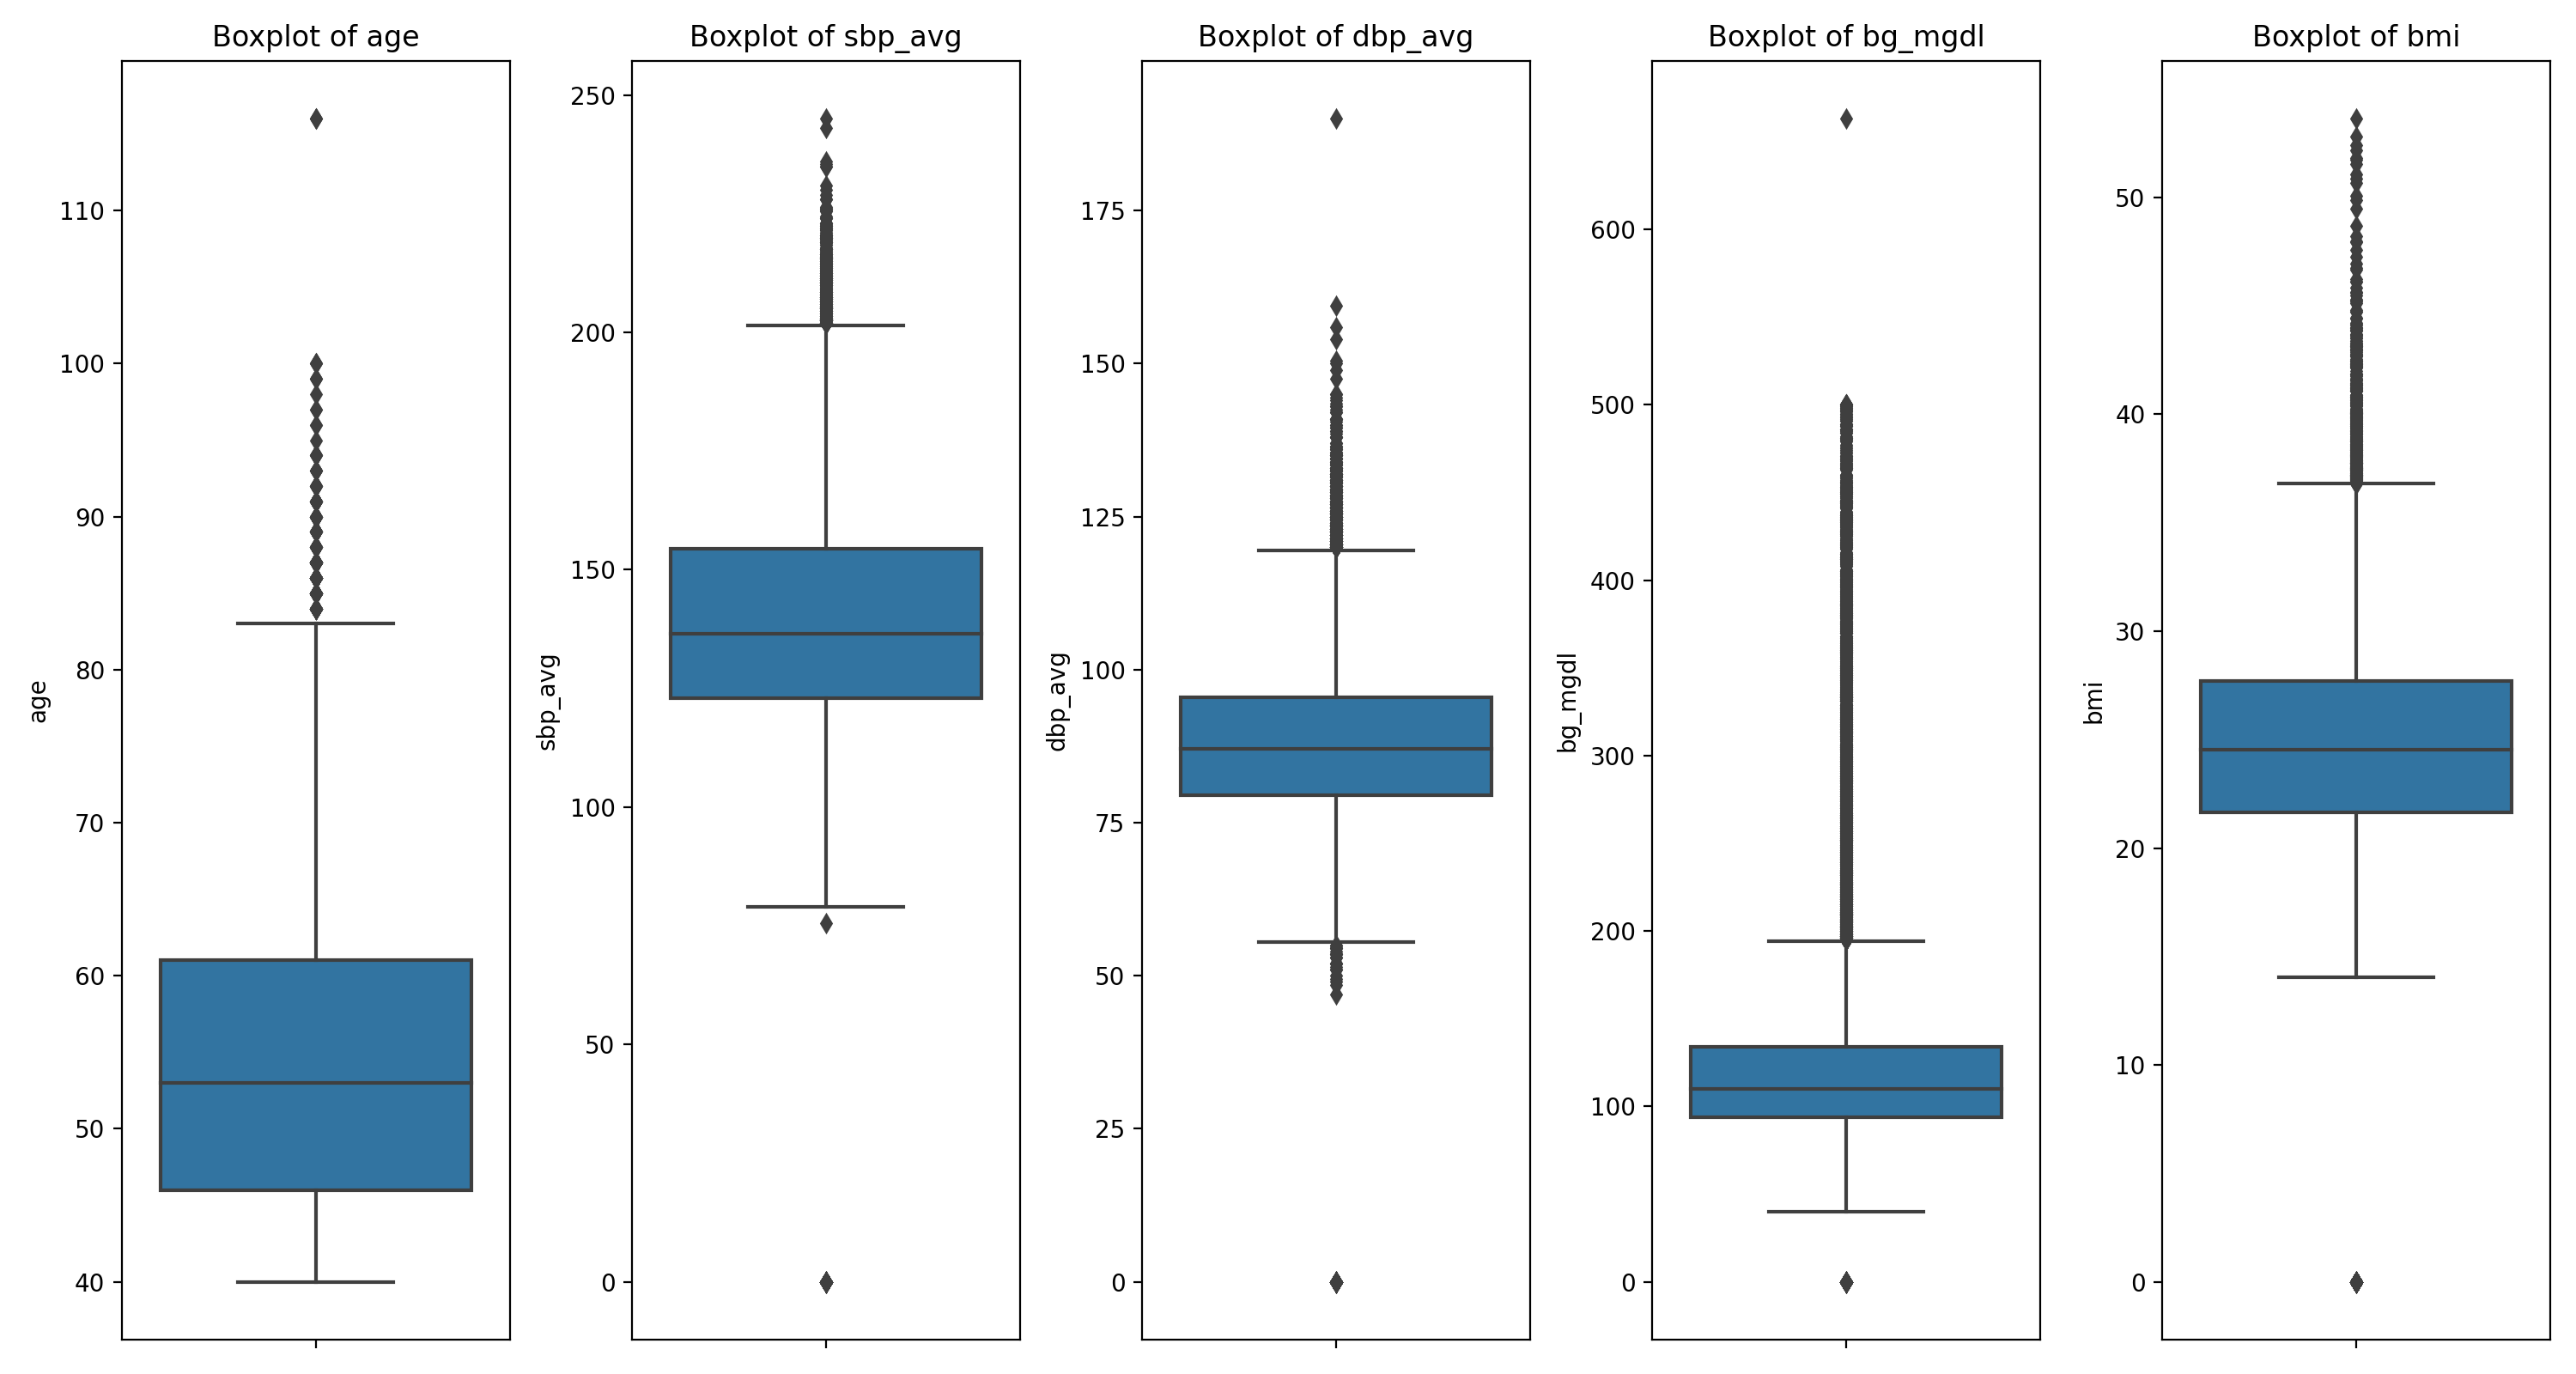

In [35]:
numeric_features = ['age', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']

# Create box plots for outlier detection
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)
    sns.boxplot(data=db1, y=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

### Analysis :

we can see the Categorical vairiables and their outliers. i will reduce the outlier for the threshold level 3 and make the data set ready for one hot encoding and then for modelling.

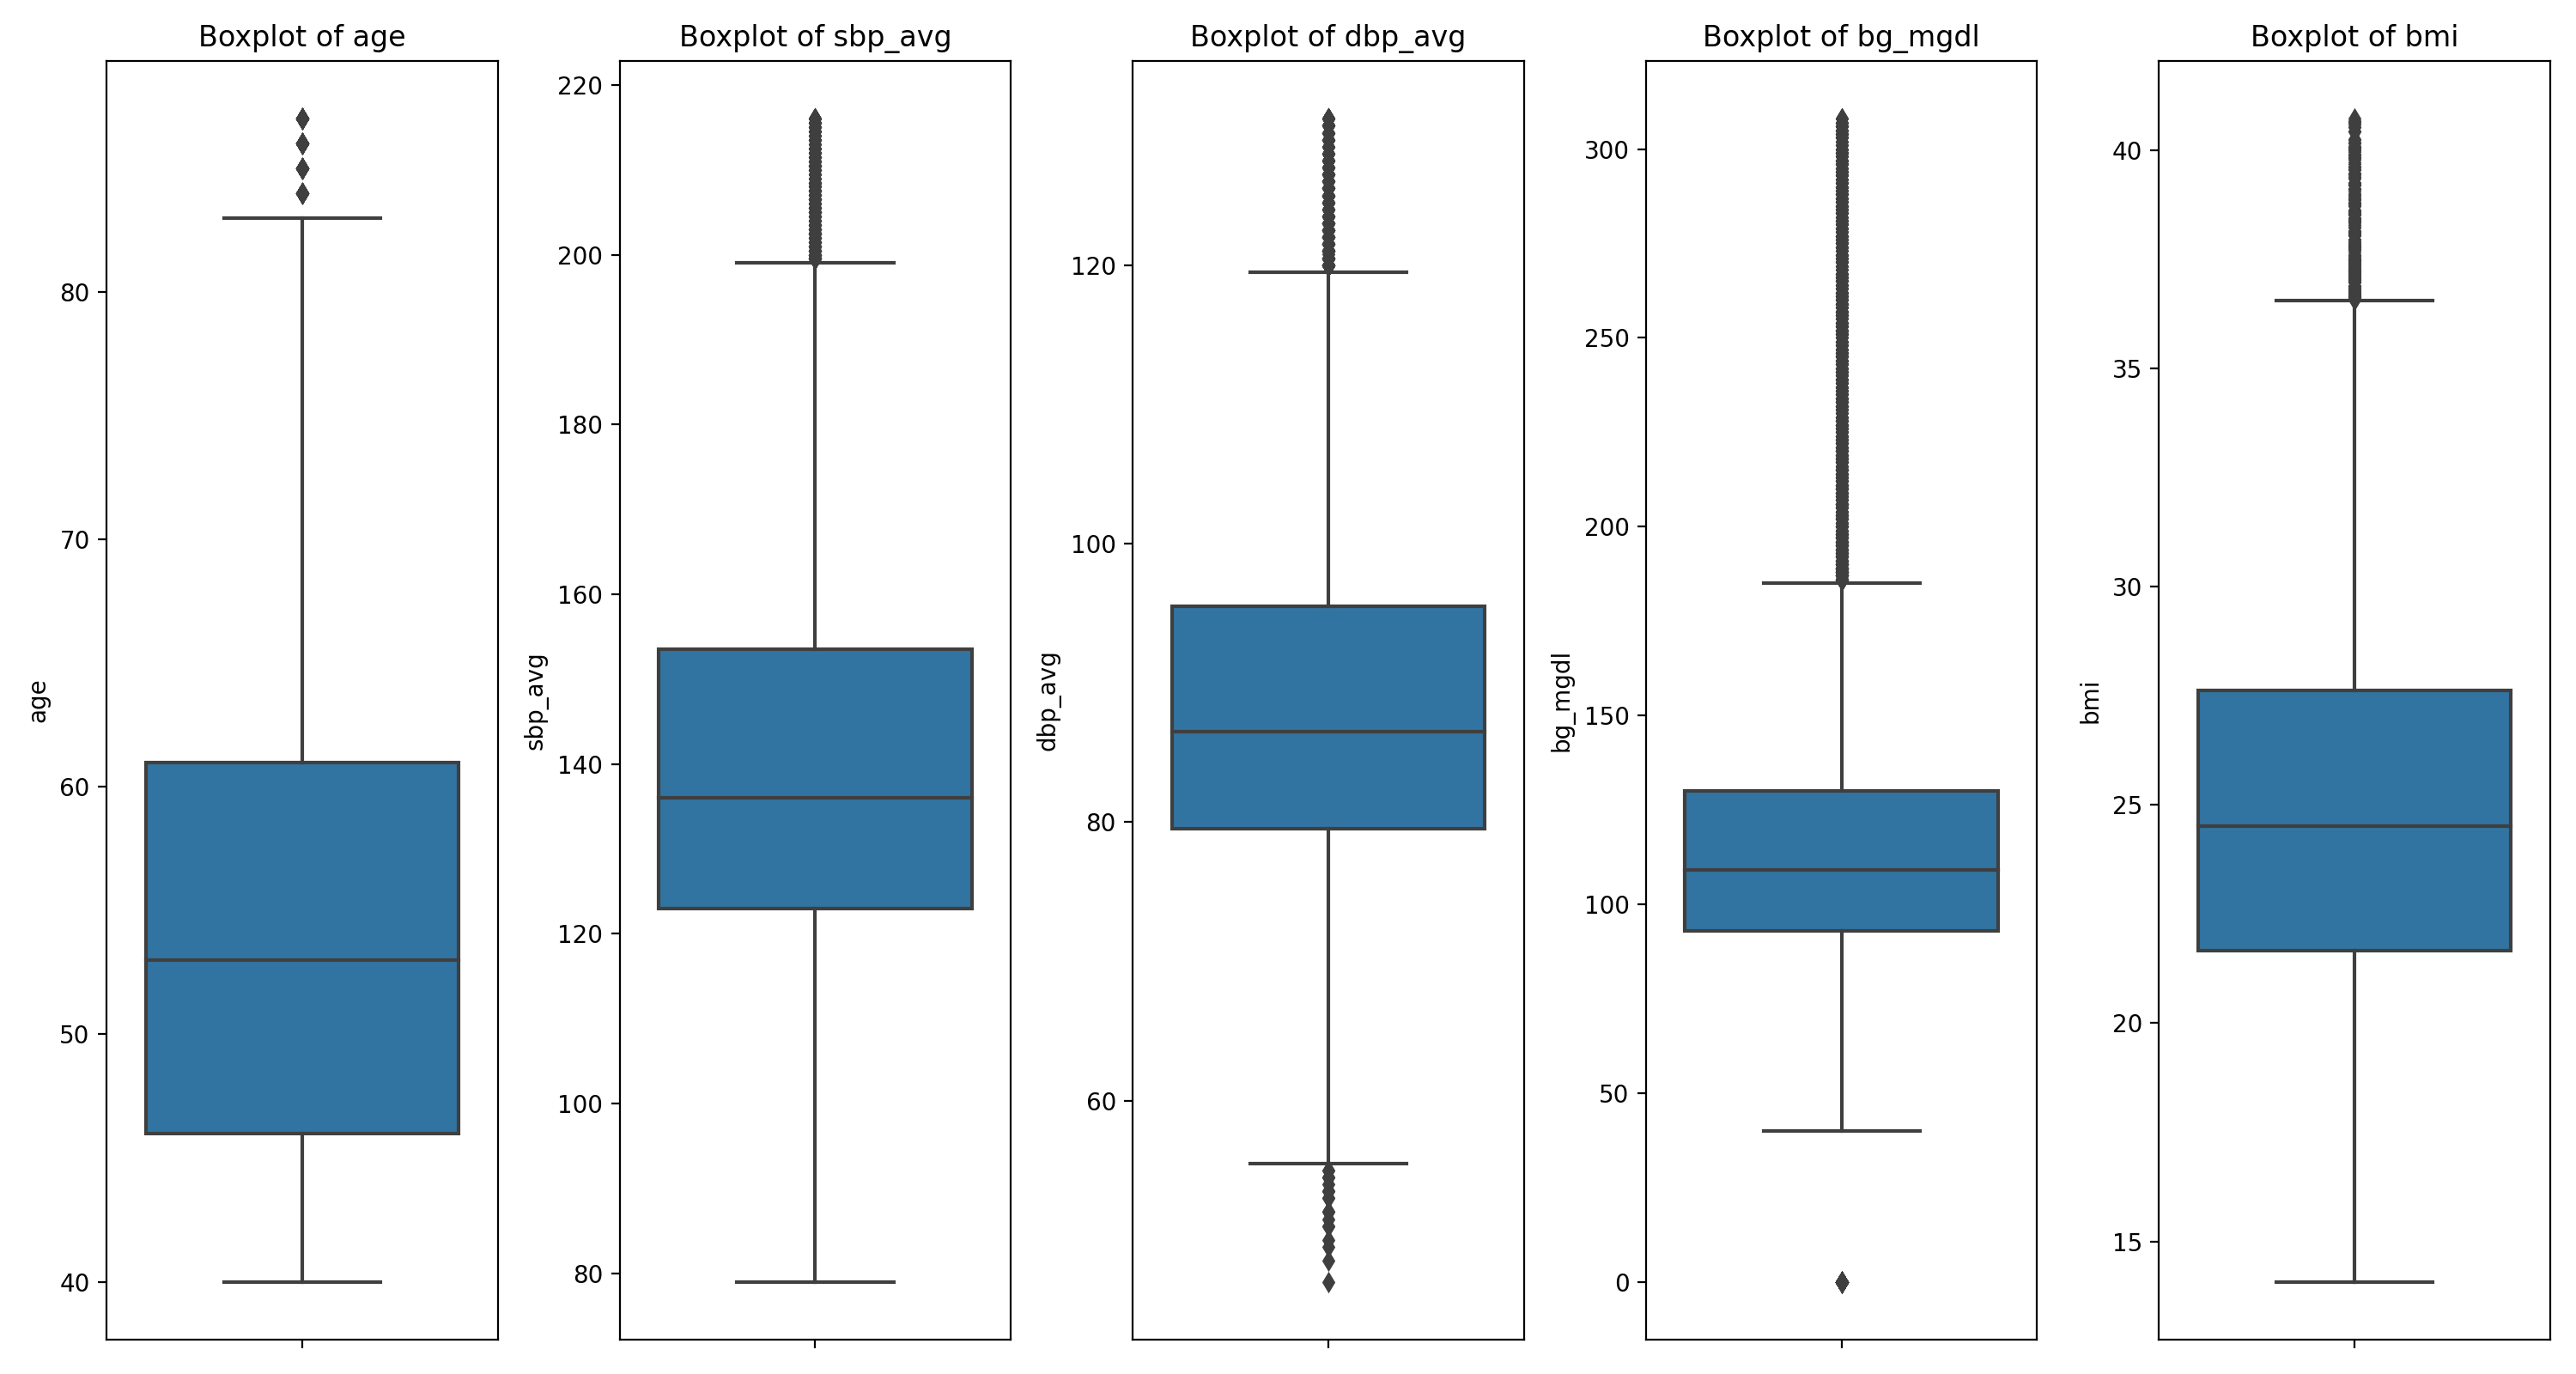

In [36]:
numeric_features = ['age', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']

# Create box plots for outlier detection
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)
    sns.boxplot(data=df_no_outliers, y=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [37]:
# I have DataFrame named 'df_no_outliers' i will just make the copy to perform one hot encoding then apply the L.R
mod = df_no_outliers.copy()

# List of binary columns I want to encode
binary_columns = ['highrisk', 'bplt', 'lltt', 'aptt', 'sex', 'smoking']  # Add your column names here

# Iterate through the binary columns and perform one-hot encoding
for column in binary_columns:
    mod[column] = mod[column].apply(lambda x: 1 if x == 'yes' else 0)

# Display the first few rows of the DataFrame after encoding
mod.head()


,patient_id,age,sex,education,marital_status,occupation,sbp_avg,dbp_avg,bg_mgdl,bmi,smoking,village,areas,cvdrisk,highrisk,bplt,lltt,aptt
0,7709001001,65,0,primary,married,self-employed,140.5,78.5,156,18.90204,0,jango,rural,0.10,0,0,0,0
1,7709001002,60,0,primary,married,self-employed,156.0,108.5,113,25.47666,0,jango,rural,0.55,0,0,0,0
3,8005070202,82,0,primary,married,not working,152.0,76.0,114,23.89138,0,tengaho,rural,0.30,0,0,0,0
4,8005070203,55,0,primary,widowed,casual worker,179.0,94.0,130,29.48870,0,tengaho,rural,0.55,0,0,0,0
8,10129001001,87,0,primary,widowed,not working,149.0,86.5,77,15.03558,0,jango,rural,0.20,0,0,0,0


In [38]:
# I have DataFrame named 'test' i will just make the copy to perform one hot encoding then apply the L.R
test = db1.copy()

# List of binary columns I want to encode
binary_columns = ['highrisk', 'bplt', 'lltt', 'aptt', 'sex', 'smoking']  # Add your column names here

# Iterate through the binary columns and perform one-hot encoding
for column in binary_columns:
    test[column] = test[column].apply(lambda x: 1 if x == 'yes' else 0)

# Display the first few rows of the DataFrame after encoding
test.head()

,patient_id,age,sex,education,marital_status,occupation,sbp_avg,dbp_avg,bg_mgdl,bmi,smoking,village,areas,cvdrisk,highrisk,bplt,lltt,aptt
0,7709001001,65,0,primary,married,self-employed,140.5,78.5,156,18.90204,0,jango,rural,0.10,0,0,0,0
1,7709001002,60,0,primary,married,self-employed,156.0,108.5,113,25.47666,0,jango,rural,0.55,0,0,0,0
2,8005070201,87,0,primary,married,not working,153.5,77.0,91,0.00000,0,tengaho,rural,0.30,0,0,0,0
3,8005070202,82,0,primary,married,not working,152.0,76.0,114,23.89138,0,tengaho,rural,0.30,0,0,0,0
4,8005070203,55,0,primary,widowed,casual worker,179.0,94.0,130,29.48870,0,tengaho,rural,0.55,0,0,0,0


<a id="subsection6.1"></a>
## Linear Regression :

#### Prepare the Dataset ready to use in Algorithms :

In [39]:
X = mod[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = mod['highrisk']


In [40]:
# Defining the features and target variable
X = mod[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = mod['highrisk']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
linear_reg = LinearRegression()

# Fitting the model with the training data
linear_reg.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = linear_reg.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

# Printing the coefficients
coefficients = linear_reg.coef_
print(f'Coefficients: {coefficients}')

# Printing the intercept
intercept = linear_reg.intercept_
print(f'Intercept: {intercept}')


Mean Squared Error: 0.0
Coefficients: [0. 0. 0. 0. 0. 0.]
Intercept: 0.0


In [41]:
print(test.shape)

(22011, 18)


In [42]:
# Test is the original dataset without removing the outliers.
# Defining the features and target variable
X = test[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = test['highrisk']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
linear_reg = LinearRegression()

# Fitting the model with the training data
linear_reg.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = linear_reg.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

# Printing the coefficients
coefficients = linear_reg.coef_
print(f'Coefficients: {coefficients}')

# Printing the intercept
intercept = linear_reg.intercept_
print(f'Intercept: {intercept}')


Mean Squared Error: 0.0
Coefficients: [0. 0. 0. 0. 0. 0.]
Intercept: 0.0


In [43]:
# Try to use the standard scaler to see the model performance:
# Features and target variable
X = mod[['age', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]  # Changed the variable name here
y = mod['highrisk']  # Changed the variable name here

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.0


In [44]:
from sklearn.model_selection import cross_val_score


# Cross-validation for model evaluatoin 
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_scores = np.abs(cv_scores)

# Print the 5 MSE scores
print(f'Cross-Validation Mean Squared Errors: {cv_scores}')

# Calculate the average MSE across the 5 folds
average_mse = np.mean(cv_scores)
print(f'Average Cross-Validation MSE: {average_mse}')


Cross-Validation Mean Squared Errors: [0. 0. 0. 0. 0.]
Average Cross-Validation MSE: 0.0


### Note: 

While perfect predictions might seem ideal, they often indicate underlying issues that need to be addressed. It's crucial to validate the model rigorously, ensuring it's robust, interpretable, and generalizable to new, unseen data. Try corroborate the findings with domain Expert to ensure the results are plausible and actionable.

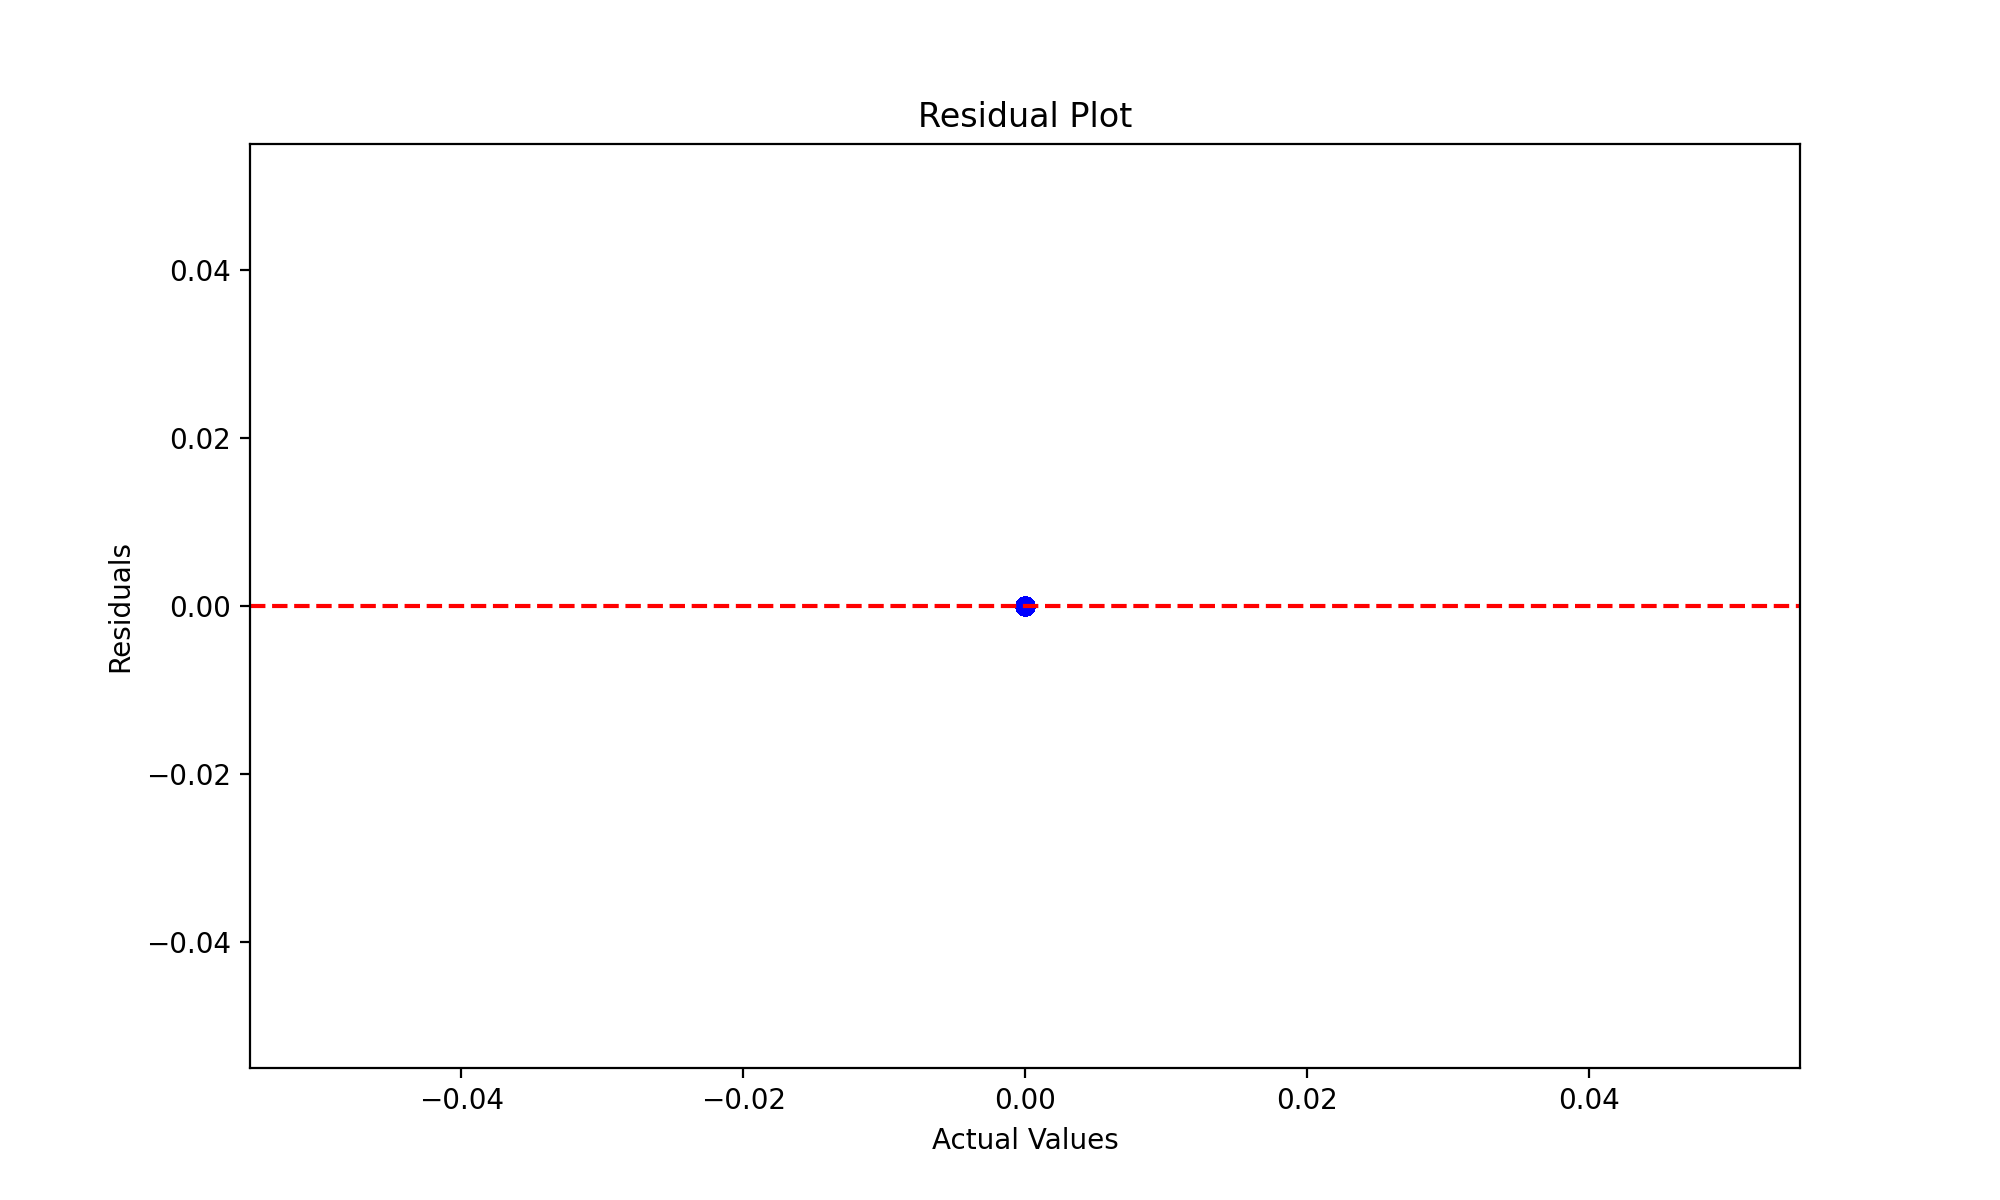

In [45]:
# import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals, c='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [46]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


R-squared: 1.0
Mean Absolute Error: 0.0


In [47]:
# Add a small random noise to the features
X_noisy = X_scaled + np.random.normal(0, 0.01, X_scaled.shape)

# Predict with noisy data
y_pred_noisy = model.predict(X_noisy)

# Calculate the Mean Absolute Error with noisy data
mae_noisy = mean_absolute_error(y, y_pred_noisy)
print(f'Mean Absolute Error with Noisy Data: {mae_noisy}')


Mean Absolute Error with Noisy Data: 0.0


In [48]:
# Print feature names and corresponding coefficients
for feature, coef in zip(['age', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi'], model.coef_):
    print(f'{feature}: {coef}')


age: 0.0
sbp_avg: 0.0
dbp_avg: 0.0
bg_mgdl: 0.0
bmi: 0.0


### Test the model and its Performance with External values:

In [49]:
np.random.seed(0)  # For reproducibility
X_val = np.random.rand(10, 5) * 10  # 10 samples, 5 features
y_val = np.random.randint(0, 2, 10)  # 10 binary target values

# Scaling the validation features similar to the training features
scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)

# Predict on the validation dataset
y_val_pred = model.predict(X_val_scaled)

# Calculate the Mean Absolute Error on the validation dataset
mae_val = mean_absolute_error(y_val, y_val_pred)
print(f'Mean Absolute Error on Validation Data: {mae_val}')

# Print actual vs predicted values
for actual, predicted in zip(y_val, y_val_pred):
    print(f'Actual: {actual}, Predicted: {predicted}')

Mean Absolute Error on Validation Data: 0.4
Actual: 1, Predicted: 0.0
Actual: 0, Predicted: 0.0
Actual: 0, Predicted: 0.0
Actual: 1, Predicted: 0.0
Actual: 0, Predicted: 0.0
Actual: 0, Predicted: 0.0
Actual: 0, Predicted: 0.0
Actual: 1, Predicted: 0.0
Actual: 1, Predicted: 0.0
Actual: 0, Predicted: 0.0


<a id="subsection6.1.1"></a>
### Findings:

After Testing Linear Regression with the current dataset, we can see that mean square, r^2, and Coefficients are zero because the splitting of the dataset was taking only one class instead of two classes, that's why all values are showing zero.s.

1. i have applied Linear Regression on dataset without having an outliers.then Mean square Error, Coefficient and intercept is showing zero.
2. d i tried on the dataset including outliers then again Mean square Error, Coefficient and intercept is showing zero t variable.


3. i have change the feature scaling to standard scaler then again mean square error is zero.

 4. i have applied cross validation score by taking the negative Mean square error to see the change but again mean square error is zero.

 5. i have check the residual value with visualization but same result zero.


6. i have check the mean square error with noisy data as sample testing again same results.

Lastly i have test the model with external values to check the performance,then i discovered that model is not taking the two classes for target variable.

In [50]:
db1.describe()

,patient_id,age,sbp_avg,dbp_avg,bg_mgdl,bmi,cvdrisk
count,2.201100e+04,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000,22011.000000
mean,6.004555e+11,54.912907,140.178197,88.258905,125.919586,24.813046,0.230760
std,1.760389e+12,10.786693,25.296091,14.199137,60.984590,5.318361,0.195516
min,7.709001e+09,40.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,1.020202e+11,46.000000,123.000000,79.500000,94.000000,21.641270,0.100000
50%,1.030302e+11,53.000000,136.500000,87.000000,110.000000,24.526820,0.100000
75%,1.040402e+11,61.000000,154.500000,95.500000,134.000000,27.700830,0.450000
max,9.711274e+12,116.000000,245.000000,190.000000,663.000000,53.624260,0.550000


In [51]:
db1['highrisk'] = db1['highrisk'].map({'Yes': 1, 'No': 0})

# Select features
X = db1[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = db1['highrisk']


# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.41724437315248686
Mean Squared Error: 0.21259212660369095
R-squared: 0.0037222245141086407


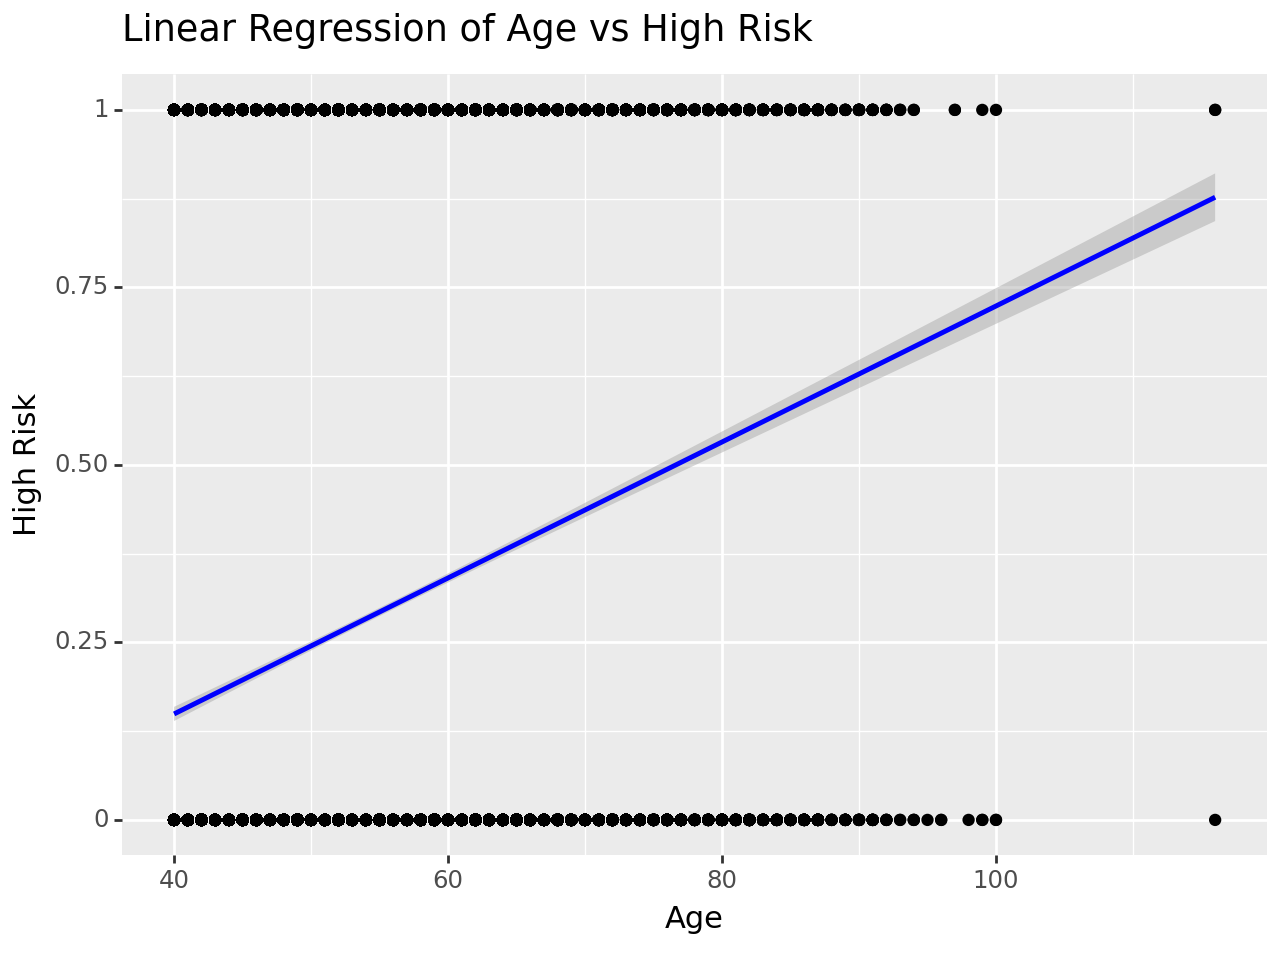

In [52]:
from plotnine import ggplot, aes, geom_point, geom_smooth, labs
# import pandas as pd

db1 = pd.DataFrame(db)


db1['highrisk'] = db1['highrisk'].map({'Yes': 1, 'No': 0})

# Create a ggplot scatter plot with linear regression line
plot = (ggplot(db1, aes(x='age', y='highrisk')) +
        geom_point() +
        geom_smooth(method='lm', color='blue') +
        labs(x='Age', y='High Risk', title='Linear Regression of Age vs High Risk'))

# Show plot
print(plot)

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Select features
X = db1[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = db1['highrisk']

# Define which columns are categorical
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create polynomial features
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', polynomial_features, ['age', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi'])
    ])

# Create a pipeline that combines the preprocessor with the linear regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print metrics
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


Mean Absolute Error: 0.22211690587700725
Mean Squared Error: 0.08710359598775974
R-squared: 0.5639559105900498


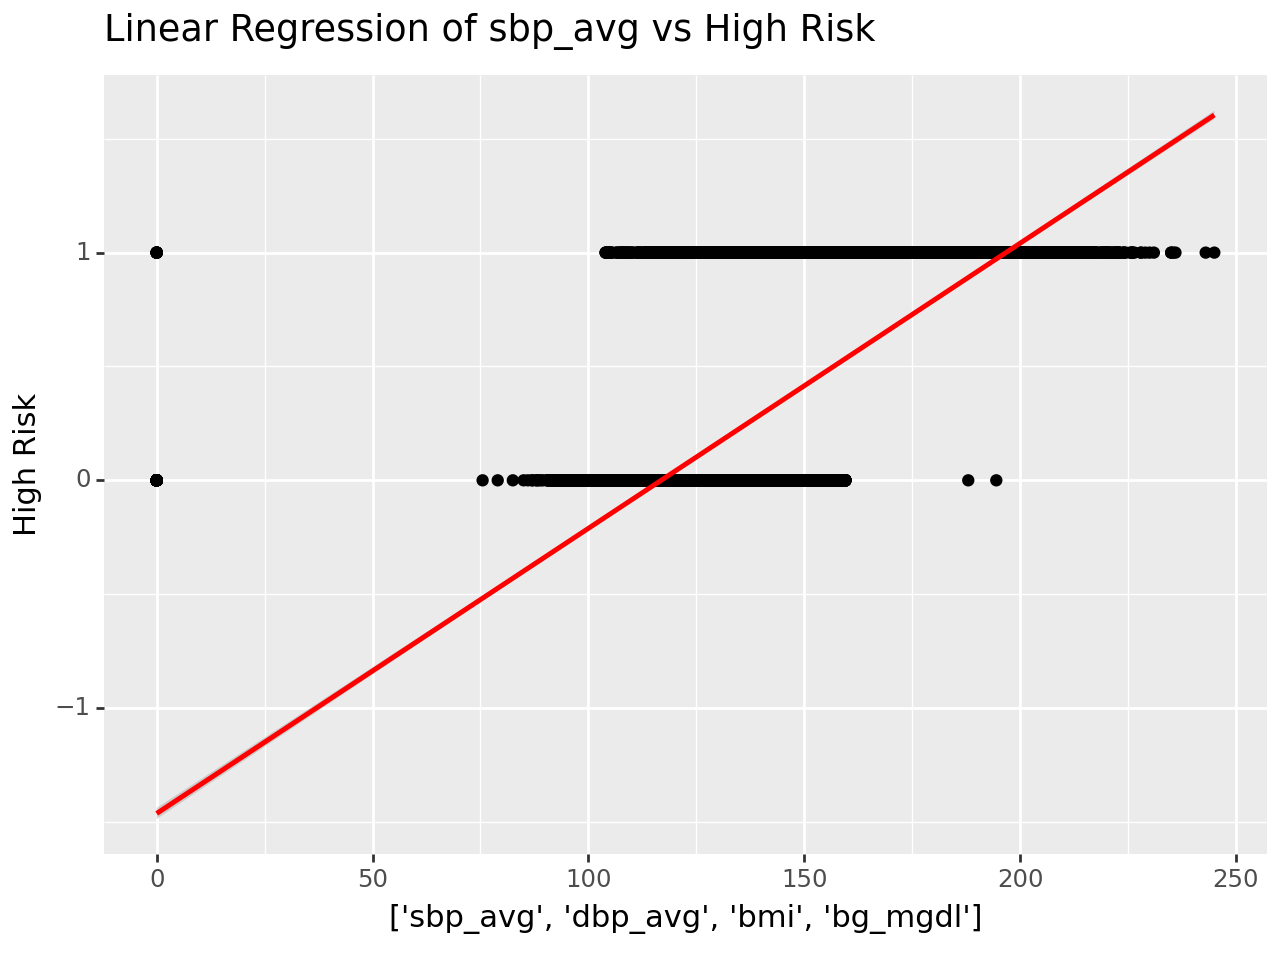

In [54]:
plot = (ggplot(db1, aes(x='sbp_avg', y='highrisk')) +
        geom_point() +
        geom_smooth(method='lm', color='red') +
        labs(x=['sbp_avg','dbp_avg','bmi','bg_mgdl'], y='High Risk', title='Linear Regression of sbp_avg vs High Risk'))

# Show plot
print(plot)

#### Visual Analsys: 

As we can see the linear relation between sbp ,dbp, bmi, bgdl with high risk as the feature values are high risk also increases.

<a id="subsection6.2"></a>
### Logistic Regression:


In [55]:
X = test[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = test['highrisk']


In [56]:
# Select features (including both numerical and categorical columns)
X = db1[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = db1['highrisk']

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LogisticRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7241457343290337


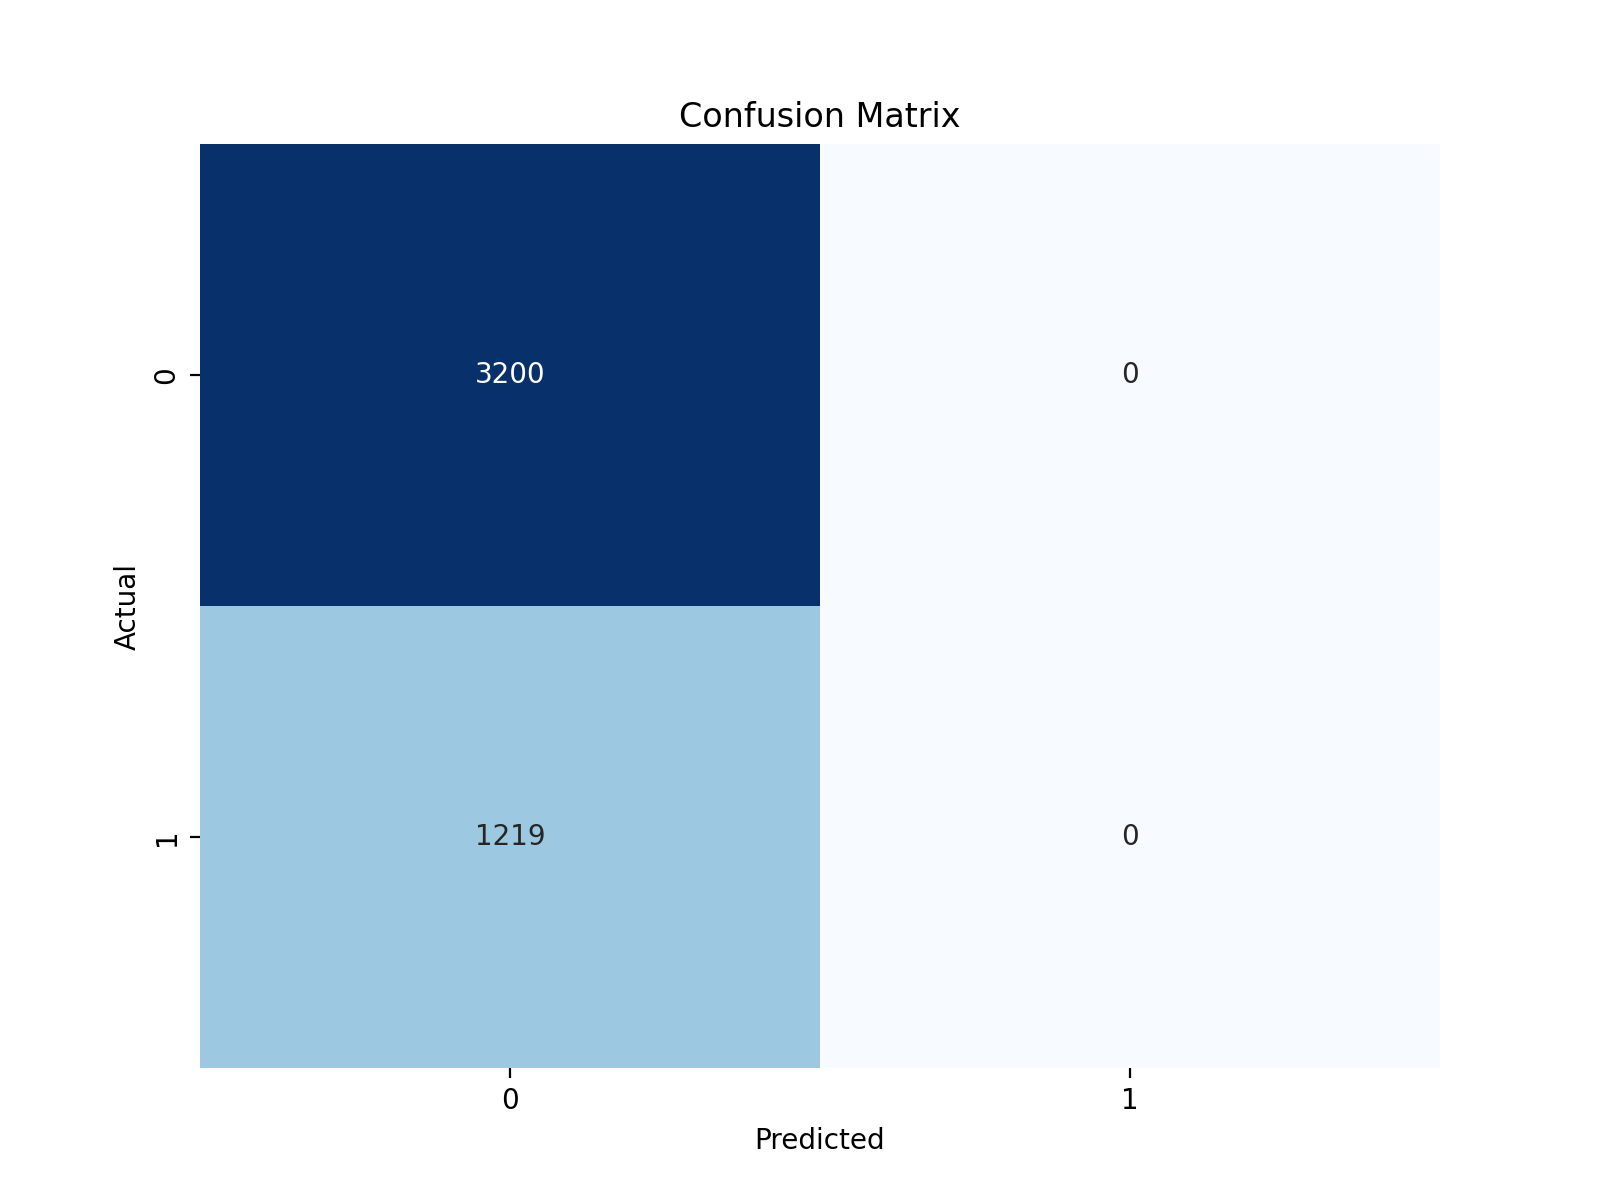

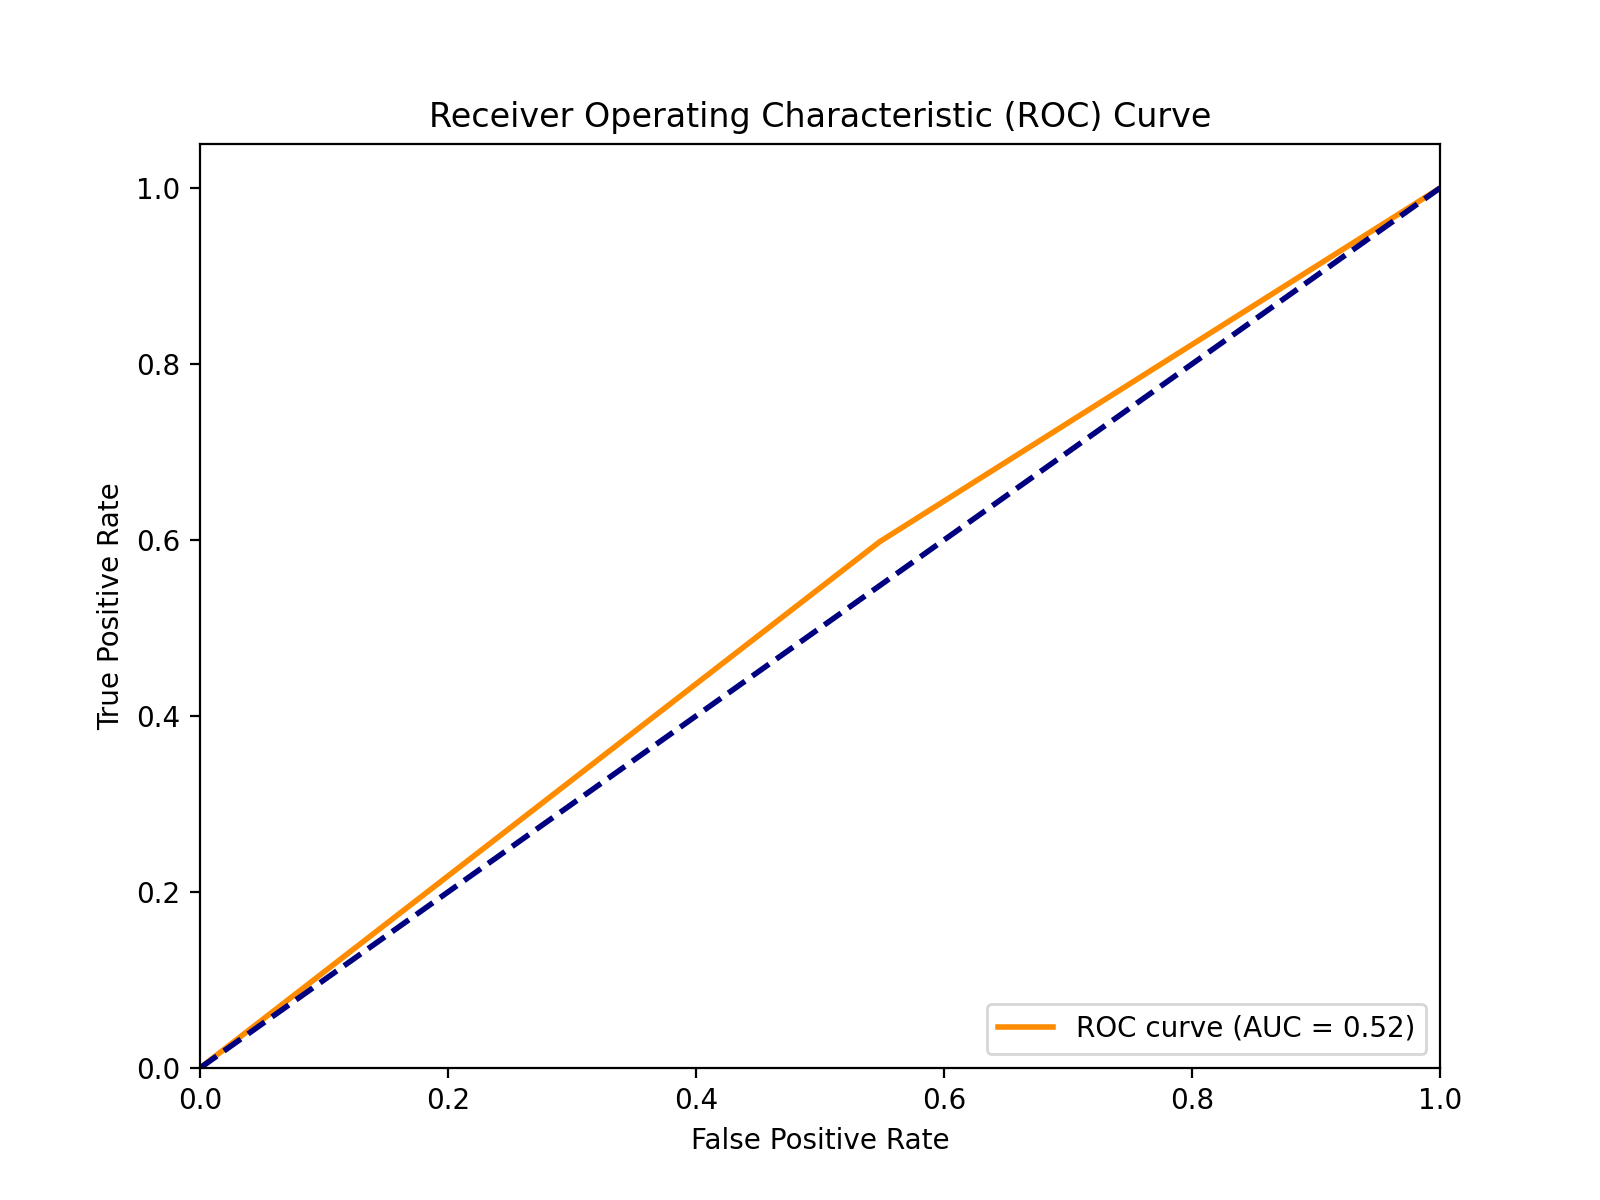

In [57]:
# Encode the target variable 'highrisk' to binary labels (0 and 1)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC (Area Under the Curve)
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = roc_auc_score(y_test_encoded, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<a id="subsection6.3"></a>
## XG Boost :

In [58]:
# Select features (including both numerical and categorical columns)
X = db1[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]

# Encode the target variable 'highrisk' using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(db1['highrisk'])

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', xgb.XGBClassifier())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the XGBoost model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7241457343290337


<a id="subsection6.4"></a>

### SVM :

In [59]:
# Select features (including both numerical and categorical columns)
X = db1[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]

# Encode the target variable 'highrisk' using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(db1['highrisk'])

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the SVM model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7241457343290337


<a id="subsection6.5"></a>

### Decision Tree Classifier :

In [60]:
# Select features (including both numerical and categorical columns)
X = db1[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]

# Encode the target variable 'highrisk' using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(db1['highrisk'])

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Decision Tree model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the names of the steps in your pipeline
print(clf.named_steps.keys())


Accuracy: 0.7241457343290337
dict_keys(['preprocessor', 'classifier'])


<a id="subsection6.6"></a>

### Naive Baise :

In [61]:

# Select features (including both numerical and categorical columns)
X = db1[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]

# Encode the target variable 'highrisk' using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(db1['highrisk'])

# Define which columns are categorical and which are numerical
categorical_cols = ['sex']
numerical_cols = ['age', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']

# Define transformers for both categorical and numerical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline.
# Here, we'll use GaussianNB for numerical features and CategoricalNB for categorical features
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GaussianNB())])  # You can switch between GaussianNB and CategoricalNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Naive Bayes model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the names of the steps in your pipeline
print(clf.named_steps.keys())


Accuracy: 0.9101606698348043
dict_keys(['preprocessor', 'classifier'])


<a id="section7"></a>
### List of Calssifiers & Accuracy Comparison :

In [62]:
from sklearn import model_selection

In [63]:
# List of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Linear Regression', LinearRegression()),
    ('XGBoost', xgb.XGBClassifier()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB())
]

# DataFrame to store results
results_df = pd.DataFrame(columns=['Algorithm', 'Accuracy'])

# Evaluate each model
for name, classifier in classifiers:
    # Create a pipeline with the classifier
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])
    
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy (note: for linear regression, you should calculate another appropriate metric like RMSE)
    if name != 'Linear Regression':
        accuracy = accuracy_score(y_test, y_pred)
    else:
        accuracy = None  # or calculate RMSE or another regression metric
    
    # Store the results in the DataFrame
    results_df = results_df.append({'Algorithm': name, 'Accuracy': accuracy}, ignore_index=True)

# Print the results
print(results_df)



             Algorithm  Accuracy
0  Logistic Regression  0.923738
1    Linear Regression       NaN
2              XGBoost  0.963114
3                  SVM  0.946368
4        Decision Tree  0.926001
5          Naive Bayes  0.910161


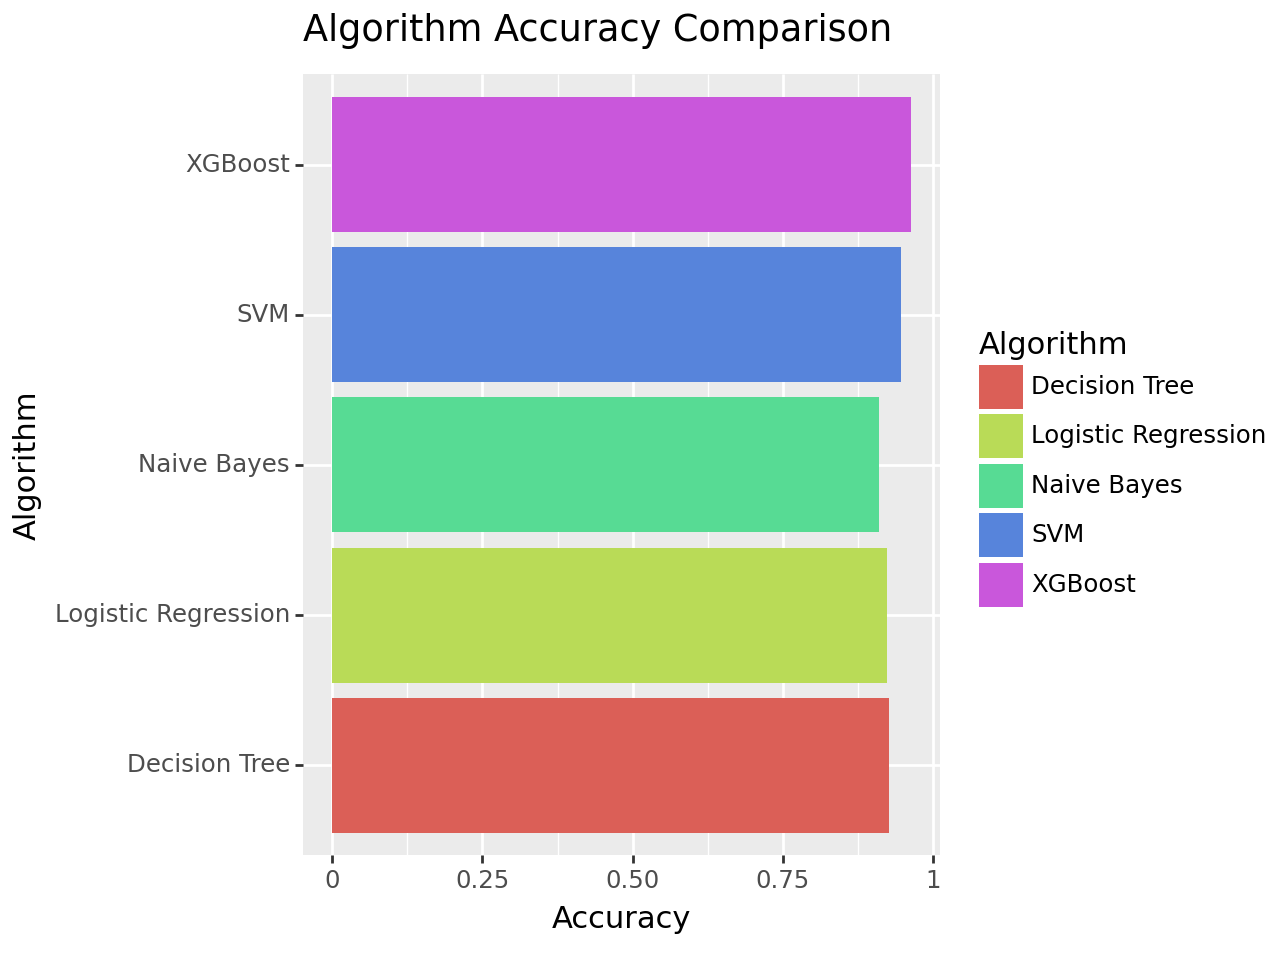

In [64]:
from plotnine import ggplot, aes, geom_bar, ggtitle, xlab, ylab, coord_flip

# Remove the row with Linear Regression as it has NaN accuracy
results_df = results_df.dropna()

# Plot
plot = (ggplot(results_df, aes(x='Algorithm', y='Accuracy', fill='Algorithm')) +
        geom_bar(stat='identity') +
        ggtitle('Algorithm Accuracy Comparison') +
        xlab('Algorithm') +
        ylab('Accuracy') +
        coord_flip())  # Flip coordinates for better readability

print(plot)


## Algorithm Accuracy Comparison Analysis & Conclusion

Logistic Regression:

Accuracy: 92.37%
Interpretation: This model has performed well, classifying approximately 92% of the test data correctly.

Linear Regression:
Accuracy: Not Applicable
Interpretation: Since it's a regression model, accuracy is not a suitable metric. we should consider evaluating it using metrics like RMSE, MAE, or R^2.

XGBoost:
Accuracy: 96.31%
Interpretation: XGBoost has given the highest accuracy among all the tested models. It's a powerful gradient boosting algorithm that performed excellently on your dataset.

SVM (Support Vector Machine):
Accuracy: 94.64%
Interpretation: SVM also performed well, with an accuracy close to that of XGBoost. It's a reliable model for classification tasks.

Decision Tree:
Accuracy: 92.60%
Interpretation: The decision tree has a comparable performance to logistic regression. It's a simpler model and can be visualized easily, but it might be prone to overfitting.

Naive Bayes:
Accuracy: 91.02%
Interpretation: Naive Bayes has the lowest accuracy among the classifiers tested, but it's still above 90%, which is quite good. It's a fast and simple algorithm, especially suitable for high-dimensional datasets.


### Conclusion :


_Logistic Regression: 92.37%_
_XGBoost: 96.31%_
_SVM: 94.64%_
_Decision Tree: 92.60%_
_Naive Bayes: 91.02%_
_Linear Regression: Not applicable for classification tasks_


**Concluding Remarks:**

Best Model for Prediction:
The XGBoost model has emerged as the most accurate model with an accuracy of 96.31%. It has outperformed other classification models in predicting the CVD risk based on the features provided.

Feature Set:
The features used for prediction include age, sex, average systolic blood pressure (sbp_avg), average diastolic blood pressure (dbp_avg), blood glucose level (bg_mgdl), and body mass index (bmi). These are critical health metrics and are often associated with an individual's cardiovascular health.


Utilization in Healthcare Practice:

_Risk Stratification:_
The XGBoost model can be employed in healthcare settings for risk stratification. It can help in identifying patients at high risk of CVD, enabling early interventions.

_Personalized Healthcare:_
With the model’s high accuracy, healthcare providers can offer personalized health plans based on the predicted risk. It aids in tailoring preventive measures for individuals, enhancing the effectiveness of interventions.

_Resource Allocation:_
The model aids in optimal resource allocation. Patients identified at higher risk can be prioritized, ensuring timely care and management.

_Health Monitoring:_
Regular monitoring of the features (age, sex, sbp_avg, dbp_avg, bg_mgdl, bmi) can be integrated into routine health checks. The model can analyze these parameters to update the CVD risk, facilitating dynamic health management.

_Technology Integration:_
The model can be integrated into electronic health records (EHR) systems and mobile health applications. It allows real-time risk assessment, enhancing patient engagement and awareness.

_Data-Driven Decisions:_
The use of the XGBoost model supports data-driven decision-making in healthcare. It enhances the precision and reliability of risk assessments, contributing to evidence-based practice.

_Future Research and Improvements:_
While XGBoost has shown promising results, continuous evaluation and improvement are essential. Incorporating more features, exploring feature interactions, and tuning the model parameters can enhance its performance.

**Final Thoughts:**

The XGBoost model, with its high accuracy, stands as a valuable tool for predicting CVD risk. Its integration into clinical practice can revolutionize CVD management, promoting preventive healthcare, reducing morbidity and mortality, and enhancing the quality of life for individuals. It underscores the pivotal role of machine learning in transforming healthcare, making it more proactive, personalized, and precise.